In [324]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import f_classif
import numpy as np
import hvplot.pandas


pd.set_option('display.max_columns', None)

### Import Data


In [325]:
filename = 'loan_data.csv'
df = pd.read_csv(filename)

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_40344\2570835424.py:2: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


In [326]:
print(df.shape)

df.head()

(759338, 72)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,NaN,NaN,OWN,10000.0,Not Verified,Jun-2017,Current,n,NaN,credit_card,Credit card refinancing,148xx,NY,21.61,0,Sep-1985,1.0,NaN,NaN,4,0,3911.0,55.1,6,w,2029.91,2029.91,382.99,382.99,270.09,112.90,0.0,0.0,0.0,Dec-2017,77.08,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,3911.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.0,Not Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,021xx,MA,25.61,0,Jun-1992,0.0,NaN,NaN,9,0,33752.0,105.8,26,w,14813.07,14813.07,2060.09,2060.09,1186.93,873.16,0.0,0.0,0.0,Dec-2017,360.95,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,234457.0,2.0,0.0,0.0,26.0,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,Front Office,7 years,MORTGAGE,46350.0,Not Verified,Jun-2017,Current,n,NaN,home_improvement,Home improvement,018xx,MA,8.88,0,Jun-2002,0.0,NaN,NaN,11,0,12425.0,44.9,27,w,5340.82,5340.82,1032.46,1032.46,684.18,348.28,0.0,0.0,0.0,Dec-2017,209.01,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,121311.0,1.0,1.0,2.0,10.0,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,Manager,10+ years,RENT,44000.0,Source Verified,Jun-2017,Current,n,NaN,car,Car financing,913xx,CA,27.06,0,Jan-2007,1.0,NaN,NaN,15,0,8769.0,18.7,19,w,17898.81,17898.81,3237.80,3237.80,2501.19,736.61,0.0,0.0,0.0,Dec-2017,652.91,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,62335.0,1.0,1.0,1.0,6.0,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,Paramedic,10+ years,MORTGAGE,85000.0,Source Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,560xx,MN,6.79,1,Feb-2002,0.0,16.0,NaN,5,0,6866.0,88.0,24,w,11460.66,11460.66,2137.00,2137.00,1539.34,597.66,0.0,0.0,0.0,Dec-2017,431.73,Jan-2018,Dec-2017,0,16.0,1,Individual,NaN,NaN,NaN,0,0.0,15332.0,0.0,0.0,0.0,127.0,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

In [328]:
# selected_columns = [
#     'annual_inc', 'dti', 'revol_util', 'emp_length', 'home_ownership',
#     'purpose', 'loan_amnt', 'int_rate', 'installment', 'grade',
#     'sub_grade', 'verification_status', 'delinq_2yrs', 'inq_last_6mths',
#     'open_acc', 'pub_rec', 'total_acc', 'addr_state',
#     'term', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
#     'total_rec_late_fee', 'collections_12_mths_ex_med', 'loan_status' 
# ]

# selected_df = df[selected_columns]
# print(selected_df.shape)
# selected_df.head()

### Target Output - Loan Status

In [329]:
selected_df = df;

selected_df['loan_status'].value_counts()

loan_status
Current               565523
Fully Paid            130718
Charged Off            37197
Late (31-120 days)     15354
In Grace Period         6634
Late (16-30 days)       3876
Default                   36
Name: count, dtype: int64

In [330]:
selected_df= selected_df[selected_df['loan_status'] != 'In Grace Period']    # Remove loans in Grace Period

selected_df['loan_status'] = selected_df['loan_status'].str.replace(pat='Default', regex=True, repl='Charged Off') 

selected_df['loan_status'].value_counts() 

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_40344\3659155914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['loan_status'] = selected_df['loan_status'].str.replace(pat='Default', regex=True, repl='Charged Off')


loan_status
Current               565523
Fully Paid            130718
Charged Off            37233
Late (31-120 days)     15354
Late (16-30 days)       3876
Name: count, dtype: int64

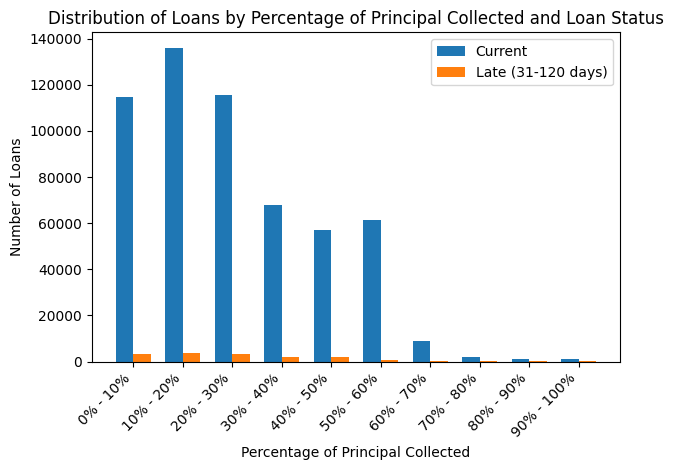

In [331]:
current_loans = selected_df[selected_df['loan_status'] == 'Current']
late_loans = selected_df[selected_df['loan_status'] == 'Late (31-120 days)']

# Combine both datasets into one DataFrame
combined_loans = pd.concat([current_loans, late_loans])

# Calculate the percentage of principal collected for each loan
combined_loans['principal_collected_percentage'] = (combined_loans['total_rec_prncp'] / combined_loans['loan_amnt']) * 100

# Define the percentage ranges
percentage_ranges = [(i, i+10) for i in range(0, 100, 10)]

# Initialize dictionaries to count the number of loans in each percentage range
current_loan_counts = {range_: 0 for range_ in percentage_ranges}
late_loan_counts = {range_: 0 for range_ in percentage_ranges}

# Count the number of loans in each percentage range for both loan statuses
for percentage, loan_status in zip(combined_loans['principal_collected_percentage'], combined_loans['loan_status']):
    for range_ in percentage_ranges:
        if range_[0] <= percentage < range_[1]:
            if loan_status == 'Current':
                current_loan_counts[range_] += 1
            elif loan_status == 'Late (31-120 days)':
                late_loan_counts[range_] += 1
            break  # Once the loan is counted in a range, move to the next loan

# Extract the range labels for plotting
labels = [f"{range_[0]}% - {range_[1]}%" for range_ in percentage_ranges]

# Extract the counts for plotting
current_counts = [current_loan_counts[range_] for range_ in percentage_ranges]
late_counts = [late_loan_counts[range_] for range_ in percentage_ranges]

# Plot the bar chart
bar_width = 0.35
x = np.arange(len(labels))
plt.bar(x - bar_width/2, current_counts, width=bar_width, label='Current')
plt.bar(x + bar_width/2, late_counts, width=bar_width, label='Late (31-120 days)')
plt.xlabel('Percentage of Principal Collected')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loans by Percentage of Principal Collected and Loan Status')
plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [332]:
# Calculate the percentage of principal collected for each loan
selected_df['principal_collected_percentage'] = (selected_df['total_rec_prncp'] / selected_df['loan_amnt']) * 100

# Update the loan status based on the percentage of principal collected
selected_df.loc[(selected_df['loan_status'] == 'Current') & (selected_df['principal_collected_percentage'] > 60), 'loan_status'] = 'Fully Paid'
selected_df.loc[(selected_df['loan_status'] == 'Late (31-120 days)') & (selected_df['principal_collected_percentage'] < 30), 'loan_status'] = 'Charged Off'

selected_df['loan_status'].value_counts() 

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_40344\1289155352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['principal_collected_percentage'] = (selected_df['total_rec_prncp'] / selected_df['loan_amnt']) * 100


loan_status
Current               552507
Fully Paid            143734
Charged Off            47781
Late (31-120 days)      4806
Late (16-30 days)       3876
Name: count, dtype: int64

In [333]:
df_modified = selected_df[~selected_df['loan_status'].isin(['Late (16-30 days)', 'Late (31-120 days)', 'Current'])]
print(df_modified.shape)
df_modified['loan_status'].value_counts() 

(191515, 73)


loan_status
Fully Paid     143734
Charged Off     47781
Name: count, dtype: int64

In [334]:
df_modified = df_modified.drop(columns=['principal_collected_percentage'])
df_modified.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
8,112038251,NaN,11575,11575,11575.0,36 months,7.35,359.26,A,A4,Solutions Architect,6 years,OWN,153000.0,Not Verified,Jun-2017,Fully Paid,n,NaN,credit_card,Credit card refinancing,923xx,CA,16.99,0,Jul-1994,0.0,24.0,84.0,20,1,8550.0,22.7,46,w,0.0,0.0,11707.816236,11707.82,11575.0,132.82,0.0,0.0,0.0,Sep-2017,11360.38,NaN,Sep-2017,0,24.0,1,Individual,NaN,NaN,NaN,0,0.0,442731.0,1.0,0.0,0.0,27.0,92315.0,63.0,2.0,8.0,1581.0,36.0,37600.0,1.0,6.0,2.0
10,112149045,NaN,7200,7200,7200.0,36 months,24.85,285.70,E,E3,Pse,2 years,RENT,50000.0,Source Verified,Jun-2017,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,985xx,WA,6.07,0,Jan-2000,0.0,72.0,NaN,4,0,3560.0,98.9,5,w,0.0,0.0,7206.461000,7206.46,7200.0,6.46,0.0,0.0,0.0,Jul-2017,7231.31,NaN,Sep-2017,0,72.0,1,Individual,NaN,NaN,NaN,0,0.0,5588.0,0.0,0.0,1.0,21.0,2028.0,51.0,0.0,1.0,2779.0,74.0,3600.0,0.0,0.0,0.0
24,112052261,NaN,7500,7500,7500.0,36 months,7.35,232.79,A,A4,Associate Director,7 years,MORTGAGE,110000.0,Not Verified,Jun-2017,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,750xx,TX,13.12,0,Mar-2013,2.0,NaN,NaN,19,0,23348.0,27.2,27,w,0.0,0.0,7642.289180,7642.29,7500.0,142.29,0.0,0.0,0.0,Oct-2017,7184.37,NaN,Oct-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,276461.0,1.0,1.0,5.0,7.0,22607.0,70.0,1.0,6.0,5965.0,39.0,85700.0,6.0,8.0,6.0
42,111999259,NaN,10000,10000,10000.0,60 months,16.02,243.29,C,C5,Biller,7 years,RENT,51979.0,Source Verified,Jun-2017,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,958xx,CA,10.11,0,Aug-2006,0.0,NaN,55.0,15,2,5733.0,20.0,21,w,0.0,0.0,10026.700000,10026.70,10000.0,26.70,0.0,0.0,0.0,Jul-2017,10048.95,NaN,Oct-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,251.0,10956.0,1.0,1.0,2.0,9.0,5223.0,95.0,2.0,5.0,3898.0,32.0,28700.0,0.0,0.0,0.0
91,111808508,NaN,14000,14000,14000.0,36 months,16.02,492.34,C,C5,cdl driver,7 years,MORTGAGE,75000.0,Verified,Jun-2017,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,026xx,MA,10.86,1,May-2008,0.0,17.0,NaN,4,0,2700.0,90.0,10,w,0.0,0.0,14375.136851,14375.14,14000.0,375.14,0.0,0.0,0.0,Sep-2017,13913.95,NaN,Sep-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,127645.0,1.0,1.0,2.0,7.0,24984.0,82.0,2.0,3.0,2700.0,83.0,3000.0,3.0,0.0,4.0


### Select the features

In [335]:
df_numerical_features = df_modified.select_dtypes(include=['int', 'float'])
df_numerical_features.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,1.915150e+05,0.0,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,1.915150e+05,191475.000000,191515.00000,191514.000000,100142.000000,38842.000000,191515.000000,191515.000000,1.915150e+05,191381.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,55631.000000,191515.0,4.227000e+03,4227.000000,191515.000000,191515.000000,1.915150e+05,191472.000000,191473.000000,191473.000000,186982.000000,1.914730e+05,166854.000000,191473.000000,191473.000000,191473.000000,191459.000000,1.915150e+05,191473.000000,191472.000000,191472.000000
mean,8.486023e+07,NaN,14604.011174,14604.011174,14598.267188,13.787241,450.622469,7.984813e+04,18.566909,0.34201,0.635572,34.314144,68.855826,11.931541,0.261656,1.612410e+04,47.740032,25.423622,1064.939210,1064.585865,12434.565498,12429.780432,10931.569203,1351.423787,1.292128,150.280373,26.772666,7686.105668,0.021236,45.559544,1.0,1.122096e+05,18.455997,0.006334,263.479362,1.483681e+05,1.117328,0.843419,1.849331,18.786006,3.643989e+04,72.599159,1.493615,3.146945,5578.036501,59.073943,3.447054e+04,1.120179,1.705795,2.452907
std,1.286874e+07,NaN,9114.805202,9114.805202,9111.965324,5.470286,282.461283,7.632500e+04,11.188874,0.92968,0.918926,22.091573,24.363911,5.749732,0.653623,2.362275e+04,24.735198,12.319893,3948.994186,3947.535300,9837.982116,9834.976957,9298.013275,1460.226132,8.331000,708.622148,124.611763,8587.586784,0.164154,22.427098,0.0,5.359343e+04,7.379407,0.083813,1983.526741,1.629015e+05,1.257261,1.044951,1.762987,24.244758,4.230923e+04,22.363027,1.617289,2.767610,5588.641039,20.724882,3.522036e+04,1.632743,2.931404,2.632314
min,6.510400e+04,NaN,1000.000000,1000.000000,775.000000,5.320000,30.120000,0.000000e+00,-1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.807200e+04,0.320000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.449201e+07,NaN,7500.000000,7500.000000,7500.000000,9.750000,242.570000,4.900000e+04,11.900000,0.00000,0.000000,16.000000,54.000000,8.000000,0.000000,5.519500e+03,28.800000,17.000000,0.000000,0.000000,4961.010000,4957.680000,3350.000000,376.310000,0.000000,0.000000,0.000000,546.335000,0.000000,28.000000,1.0,7.900000e+04,13.210000,0.000000,0.000000,3.195800e+04,0.000000,0.000000,1.000000,6.000000,1.039100e+04,60.000000,0.000000,1.000000,2212.000000,46.000000,1.470000e+04,0.000000,0.000000,1.000000
50%,8.391064e+07,NaN,12000.000000,12000.000000,12000.000000,12.880000,377.770000,6.800000e+04,17.890000,0.00000,0.000000,31.000000,71.000000,11.000000,0.000000,1.058800e+04,47.000000,24.000000,0.000000,0.000000,9935.580000,9927.240000,8400.000000,878.360000,0.000000,0.000000,0.000000,4821.850000,0.000000,45.000000,1.0,1.030000e+05,18.070000,0.000000,0.000000,8.873700e+04,1.000000,1.000000,1.000000,11.000000,2.491500e+04,76.000000,1.000000,3.000000,4231.000000,61.000000,2.530000e+04,1.000000,0.000000,2.000000
75%,9.361337e+07,NaN,20000.000000,20000.000000,20000.000000,16.990000,607.820000,9.500000e+04,24.600000

In [336]:
df_modified = df_modified.drop(columns = ['member_id', 'policy_code', 'id', 'funded_amnt', 'funded_amnt_inv', 'total_pymnt_inv', 'out_prncp_inv'])

#### Features with missing values

In [337]:
total = df_modified.isnull().sum()
percent = (df_modified.isnull().sum() / len(df_modified)) * 100

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_with_nulls = missing_data[missing_data['Total'] > 0].sort_values(by='Total', ascending=False)

print(missing_data_with_nulls)

                              Total    Percent
desc                         191508  99.996345
dti_joint                    187288  97.792862
verification_status_joint    187288  97.792862
annual_inc_joint             187288  97.792862
next_pymnt_d                 167915  87.677205
mths_since_last_record       152673  79.718560
mths_since_last_major_derog  135884  70.952145
mths_since_last_delinq        91373  47.710623
il_util                       24661  12.876798
emp_title                     12347   6.447015
emp_length                    12238   6.390100
title                          8918   4.656554
mths_since_rcnt_il             4533   2.366916
last_pymnt_d                    948   0.495000
revol_util                      134   0.069968
all_util                         56   0.029241
open_acc_6m                      43   0.022453
total_cu_tl                      43   0.022453
inq_last_12m                     43   0.022453
open_il_12m                      42   0.021930
open_il_24m  

Drop features with more than 47% of missing values

In [338]:
columns_to_drop = missing_data[missing_data['Percent'] > 47].index

df_modified = df_modified.drop(columns=columns_to_drop)

print(f"Columns dropped: {list(columns_to_drop)}")
df_modified.head()

Columns dropped: ['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint']


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
8,11575,36 months,7.35,359.26,A,A4,Solutions Architect,6 years,OWN,153000.0,Not Verified,Jun-2017,Fully Paid,n,credit_card,Credit card refinancing,923xx,CA,16.99,0,Jul-1994,0.0,20,1,8550.0,22.7,46,w,0.0,11707.816236,11575.0,132.82,0.0,0.0,0.0,Sep-2017,11360.38,Sep-2017,0,Individual,0,0.0,442731.0,1.0,0.0,0.0,27.0,92315.0,63.0,2.0,8.0,1581.0,36.0,37600.0,1.0,6.0,2.0
10,7200,36 months,24.85,285.70,E,E3,Pse,2 years,RENT,50000.0,Source Verified,Jun-2017,Fully Paid,n,debt_consolidation,Debt consolidation,985xx,WA,6.07,0,Jan-2000,0.0,4,0,3560.0,98.9,5,w,0.0,7206.461000,7200.0,6.46,0.0,0.0,0.0,Jul-2017,7231.31,Sep-2017,0,Individual,0,0.0,5588.0,0.0,0.0,1.0,21.0,2028.0,51.0,0.0,1.0,2779.0,74.0,3600.0,0.0,0.0,0.0
24,7500,36 months,7.35,232.79,A,A4,Associate Director,7 years,MORTGAGE,110000.0,Not Verified,Jun-2017,Fully Paid,n,debt_consolidation,Debt consolidation,750xx,TX,13.12,0,Mar-2013,2.0,19,0,23348.0,27.2,27,w,0.0,7642.289180,7500.0,142.29,0.0,0.0,0.0,Oct-2017,7184.37,Oct-2017,0,Individual,0,0.0,276461.0,1.0,1.0,5.0,7.0,22607.0,70.0,1.0,6.0,5965.0,39.0,85700.0,6.0,8.0,6.0
42,10000,60 months,16.02,243.29,C,C5,Biller,7 years,RENT,51979.0,Source Verified,Jun-2017,Fully Paid,n,debt_consolidation,Debt consolidation,958xx,CA,10.11,0,Aug-2006,0.0,15,2,5733.0,20.0,21,w,0.0,10026.700000,10000.0,26.70,0.0,0.0,0.0,Jul-2017,10048.95,Oct-2017,0,Individual,0,251.0,10956.0,1.0,1.0,2.0,9.0,5223.0,95.0,2.0,5.0,3898.0,32.0,28700.0,0.0,0.0,0.0
91,14000,36 months,16.02,492.34,C,C5,cdl driver,7 years,MORTGAGE,75000.0,Verified,Jun-2017,Fully Paid,n,debt_consolidation,Debt consolidation,026xx,MA,10.86,1,May-2008,0.0,4,0,2700.0,90.0,10,w,0.0,14375.136851,14000.0,375.14,0.0,0.0,0.0,Sep-2017,13913.95,Sep-2017,0,Individual,0,0.0,127645.0,1.0,1.0,2.0,7.0,24984.0,82.0,2.0,3.0,2700.0,83.0,3000.0,3.0,0.0,4.0


In [339]:
null_open_il_12m_rows = df_modified[df_modified['open_il_12m'].isnull()]
null_open_il_12m_rows

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
759142,1000,36 months,17.57,35.94,D,D4,NaN,NaN,RENT,22888.0,Source Verified,Jan-2016,Charged Off,n,debt_consolidation,Debt consolidation,951xx,CA,17.46,0,Feb-1996,1.0,9,0,8408.0,52.2,9,w,0.00,106.840000,64.84,42.00,0.0,0.00,0.0000,Apr-2016,35.94,Feb-2017,0,Individual,0,0.0,8408.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16100.0,NaN,NaN,NaN
759226,17325,60 months,18.20,441.83,E,E1,Plumbing foreman,10+ years,MORTGAGE,64000.0,Source Verified,Jan-2016,Fully Paid,n,other,Other,597xx,MT,33.10,0,May-2003,0.0,8,0,28842.0,74.7,15,w,0.00,20264.320769,17325.00,2939.32,0.0,0.00,0.0000,Dec-2016,15863.54,Jan-2017,0,Individual,0,0.0,184345.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38600.0,NaN,NaN,NaN
759241,20000,60 months,20.99,540.96,E,E5,NaN,NaN,OWN,40000.0,Not Verified,Jan-2016,Charged Off,n,debt_consolidation,Debt consolidation,300xx,GA,23.02,0,Dec-1994,2.0,14,0,24880.0,54.0,26,w,0.00,2646.490000,989.65,1656.84,0.0,0.00,0.0000,Jun-2016,540.96,Oct-2016,0,Individual,0,0.0,25158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46100.0,NaN,NaN,NaN
759278,24000,36 months,12.59,803.93,C,C2,Senior Software Engineer,1 year,RENT,110000.0,Verified,Jan-2016,Fully Paid,n,major_purchase,Major purchase,840xx,UT,6.01,0,Mar-2012,1.0,6,0,9587.0,58.5,8,f,0.00,25166.000007,24000.00,1166.00,0.0,0.00,0.0000,May-2016,22666.94,Dec-2017,0,Individual,0,0.0,21160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16400.0,NaN,NaN,NaN
759279,19300,60 months,16.99,479.56,D,D3,Registered Dental Hygienist,3 years,MORTGAGE,64000.0,Verified,Jan-2016,Fully Paid,n,debt_consolidation,Debt consolidation,371xx,TN,19.75,0,Nov-1996,0.0,9,1,3715.0,28.6,23,w,0.00,23054.279127,19300.00,3754.28,0.0,0.00,0.0000,Mar-2017,16838.22,Dec-2017,0,Individual,0,0.0,35055.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13000.0,NaN,NaN,NaN
759287,8000,36 months,10.64,260.55,B,B4,NaN,NaN,RENT,19000.0,Verified,Jan-2016,Fully Paid,n,credit_card,Credit card refinancing,244xx,VA,21.98,0,Nov-2001,1.0,7,0,1941.0,20.4,8,f,3186.40,6003.060000,4813.60,1174.46,15.0,0.00,0.0000,Dec-2017,260.55,Dec-2017,0,Individual,0,853.0,7754.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9500.0,NaN,NaN,NaN
759288,30000,60 months,18.99,778.06,E,E3,Staff Engineer,7 years,MORTGAGE,122000.0,Source Verified,Jan-2016,Charged Off,n,debt_consolidation,Debt consolidation,801xx,CO,28.44,2,Feb-2001,1.0,18,0,17079.0,60.8,35,f,0.00,9097.990000,2565.22,3627.61,0.0,2905.16,522.9288,Sep-2016,778.06,Mar-2017,0,Individual,0,0.0,592561.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28100.0,NaN,NaN,NaN
759289,20000,36 months,9.17,637.58,B,B2,NaN,NaN,MORTGAGE,85000.0,Source Verified,Jan-2016,Fully Paid,n,debt_consolidation,Debt consolidation,900xx,CA,9.31,1,Jun-2005,2.0,8,1,12044.0,72.1,12,w,0.00,21706.766001,20000.00,1706.77,0.0,0.00,0.0000,Feb-2017,14066.00,Feb-2017,0,Individual,0,0.0,16489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16700.0,NaN,NaN,NaN
759291,20000,60 months,18.99,518.71,E,E3,NaN,NaN,RENT,82000.0,Source Verified,Jan-2016,Charged Off,n,debt_consolidation,Debt consolidation,325xx,FL,21.33,2,Jun-2001,1.0,8,0,4026.0,25.8,32,w,15009.18,10871.810000,4990.82,5880.99,0.0,0.00,0.0000,Oct-2017,518.71,Dec-2017,0,Individual,0,0.0,83573.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15600.0,NaN,NaN,NaN
759292,35000,36 months,12.59,1172.39,C,C2,NaN,10+ years,OWN,125000.0,Verif

In [340]:
df_modified = df_modified.dropna(subset=['open_il_12m'])

In [341]:
total = df_modified.isnull().sum()
percent = (df_modified.isnull().sum() / len(df_modified)) * 100

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_with_nulls = missing_data[missing_data['Total'] > 0].sort_values(by='Total', ascending=False)

print(missing_data_with_nulls)

                    Total    Percent
il_util             24619  12.857688
emp_title           12334   6.441639
emp_length          12226   6.385234
title                8918   4.657576
mths_since_rcnt_il   4491   2.345500
last_pymnt_d          948   0.495109
revol_util            134   0.069984
dti                    40   0.020891
all_util               14   0.007312
last_credit_pull_d      2   0.001045
inq_last_6mths          1   0.000522
open_acc_6m             1   0.000522
total_cu_tl             1   0.000522
inq_last_12m            1   0.000522


In [342]:
null_inq_last_12m_rows = df_modified[df_modified['inq_last_12m'].isnull()]
null_inq_last_12m_rows

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
741750,35000,60 months,9.8,740.21,B,B3,Subcontracts Manager,10+ years,MORTGAGE,110000.0,Source Verified,Jan-2016,Fully Paid,n,debt_consolidation,Debt consolidation,844xx,UT,20.09,0,Jun-1994,NaN,10,0,1508.0,3.5,36,w,0.0,38962.991964,35000.0,3962.99,0.0,0.0,0.0,Apr-2017,28619.11,Nov-2017,0,Individual,0,0.0,235465.0,NaN,1.0,4.0,4.0,43579.0,62.0,0.0,0.0,1508.0,40.0,43000.0,2.0,NaN,NaN


In [343]:
df_modified = df_modified.dropna(subset=['inq_last_12m'])
df_modified = df_modified.dropna(subset=['last_credit_pull_d'])

In [344]:
total = df_modified.isnull().sum()
percent = (df_modified.isnull().sum() / len(df_modified)) * 100

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_with_nulls = missing_data[missing_data['Total'] > 0].sort_values(by='Total', ascending=False)

print(missing_data_with_nulls)

                    Total    Percent
il_util             24619  12.857889
emp_title           12334   6.441740
emp_length          12226   6.385335
title                8918   4.657649
mths_since_rcnt_il   4491   2.345537
last_pymnt_d          948   0.495117
revol_util            134   0.069985
dti                    40   0.020891
all_util               14   0.007312


##### il_util (installment utilization. It represents the ratio of the borrower's current installment account balances to the original loan amounts)

In [345]:
df_modified['il_util'].describe()

count    166851.000000
mean         72.599271
std          22.363106
min           0.000000
25%          60.000000
50%          76.000000
75%          88.000000
max         558.000000
Name: il_util, dtype: float64

<Axes: xlabel='il_util', ylabel='Count'>

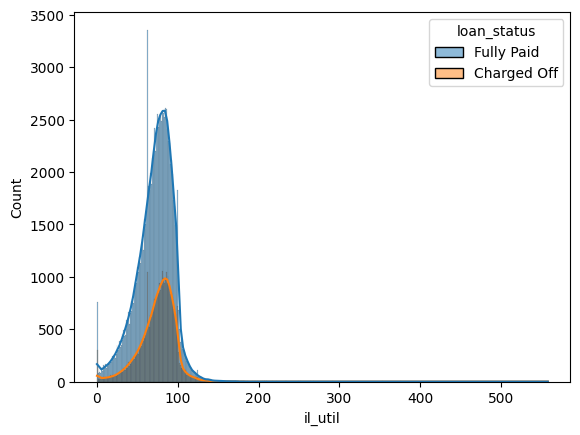

In [346]:
sns.histplot(data=df_modified, x='il_util', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='il_util'>

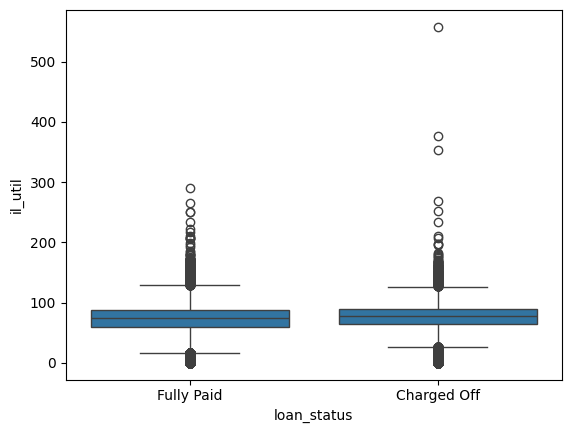

In [347]:
sns.boxplot(x='loan_status', y='il_util', data=df_modified)

<Axes: xlabel='il_util', ylabel='Count'>

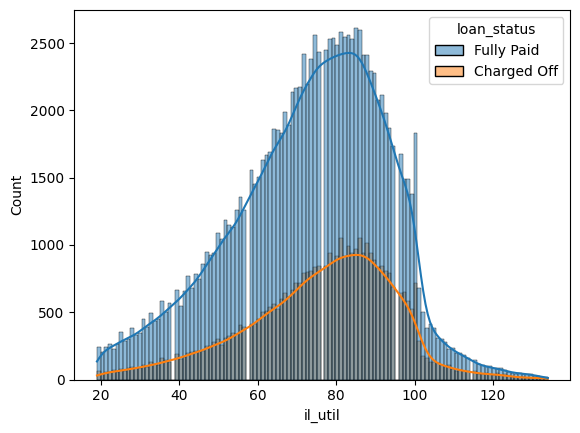

In [348]:
lower_threshold = 18
upper_threshold = 135

filtered_df = df_modified[(df_modified['il_util'] > lower_threshold) & (df_modified['il_util'] < upper_threshold)]

sns.histplot(data=filtered_df, x='il_util', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='il_util'>

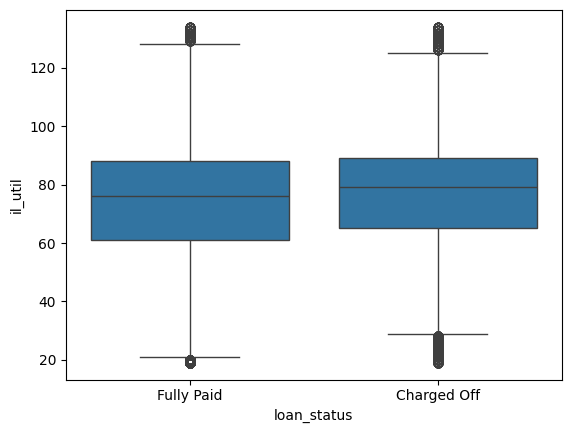

In [349]:
sns.boxplot(x='loan_status', y='il_util', data=filtered_df)

##### mths_since_rcnt_il (How many months it's been since the borrower opened their most recent installment accounts)

In [350]:
df_modified['mths_since_rcnt_il'].describe()

count    186979.000000
mean         18.786083
std          24.244915
min           0.000000
25%           6.000000
50%          11.000000
75%          21.000000
max         415.000000
Name: mths_since_rcnt_il, dtype: float64

<Axes: xlabel='mths_since_rcnt_il', ylabel='Count'>

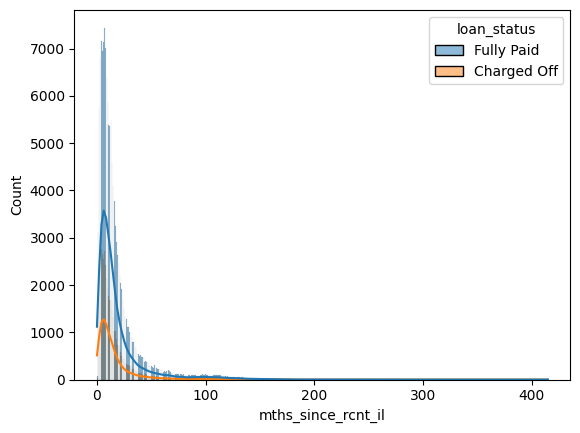

In [351]:
sns.histplot(data=df_modified, x='mths_since_rcnt_il', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='mths_since_rcnt_il'>

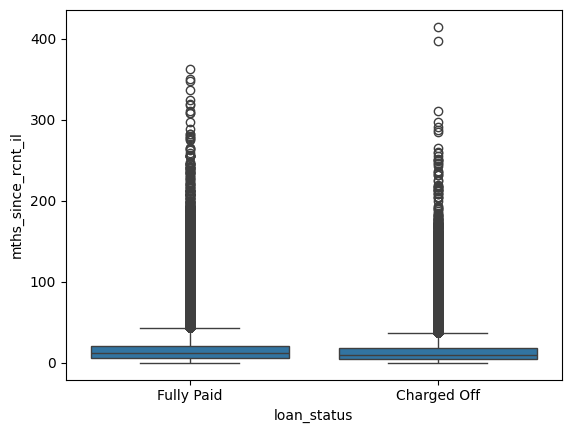

In [352]:
sns.boxplot(x='loan_status', y='mths_since_rcnt_il', data=df_modified)

Shape of the DataFrame where mths_since_rcnt_il is less than 100: (182184, 57)


<Axes: xlabel='mths_since_rcnt_il', ylabel='Count'>

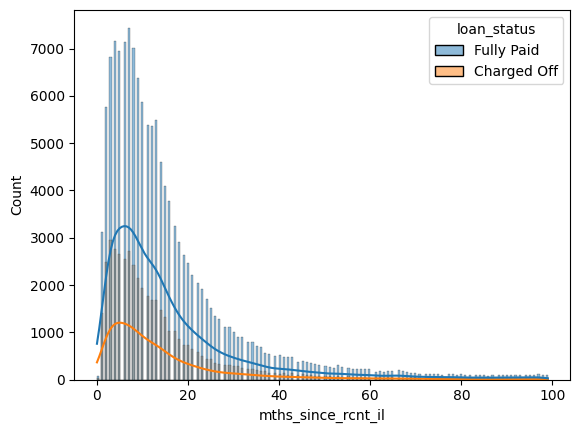

In [353]:
threshold = 100
filtered_df = df_modified[df_modified['mths_since_rcnt_il'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where mths_since_rcnt_il is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='mths_since_rcnt_il', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='mths_since_rcnt_il'>

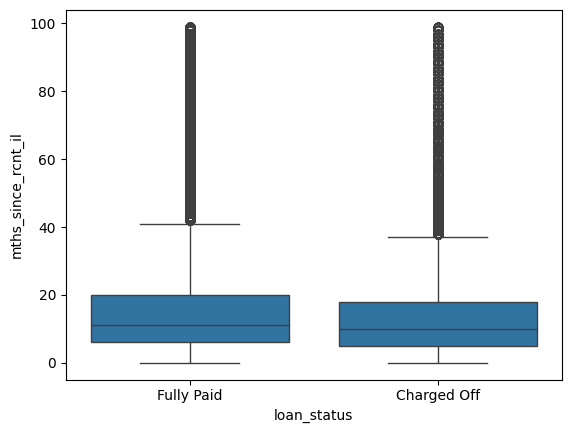

In [354]:
sns.boxplot(x='loan_status', y='mths_since_rcnt_il', data=filtered_df)

In [355]:
filtered_df['mths_since_rcnt_il_log'] = np.log1p(filtered_df['mths_since_rcnt_il'])

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_40344\3878091184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['mths_since_rcnt_il_log'] = np.log1p(filtered_df['mths_since_rcnt_il'])


<Axes: xlabel='mths_since_rcnt_il_log', ylabel='Count'>

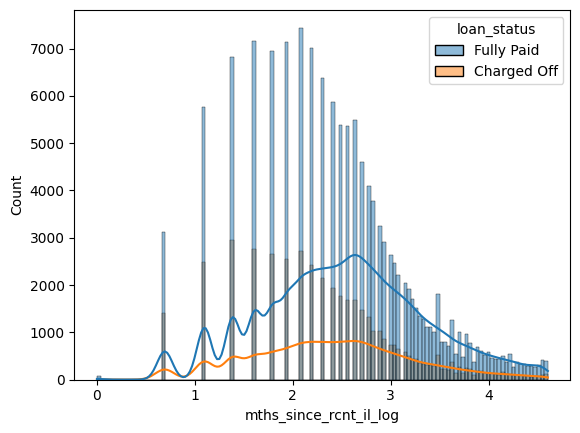

In [356]:
sns.histplot(data=filtered_df, x='mths_since_rcnt_il_log', kde=True, hue='loan_status')

##### revol_util (How much of the borrower's available credit they are currently using)

<Axes: xlabel='revol_util', ylabel='Count'>

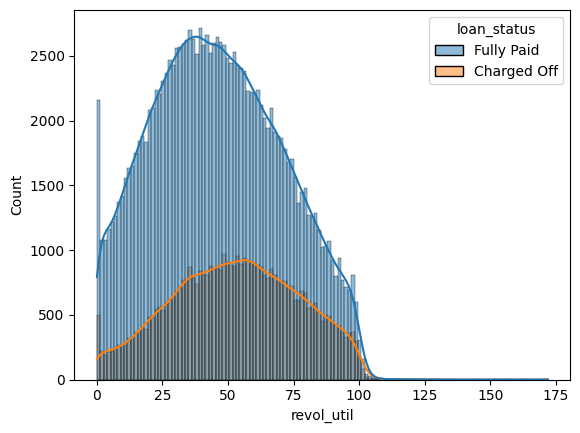

In [357]:
sns.histplot(data=df_modified, x='revol_util', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='revol_util'>

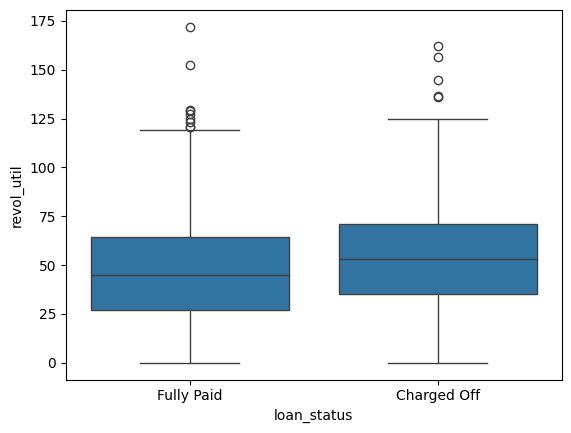

In [358]:
sns.boxplot(data=df_modified, x='loan_status', y='revol_util')

Shape of the DataFrame where revol_util is less than 120: (191319, 57)


<Axes: xlabel='revol_util', ylabel='Count'>

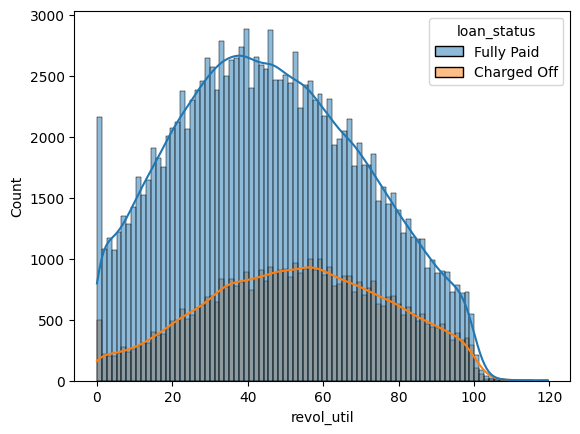

In [359]:
threshold = 120
filtered_df = df_modified[df_modified['revol_util'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where revol_util is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='revol_util', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='revol_util'>

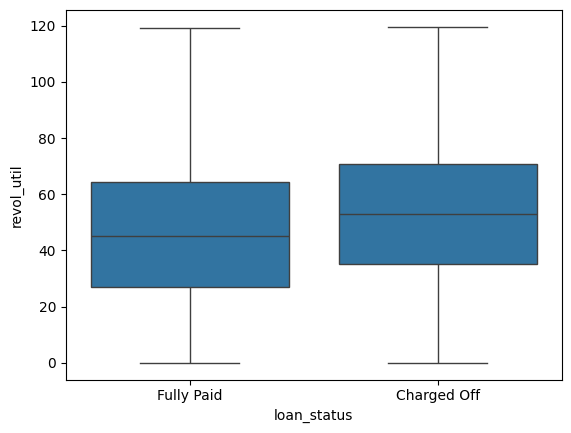

In [360]:
sns.boxplot(x='loan_status', y='revol_util', data=filtered_df)

##### all_util (How much of the borrower's total available credit is being used)

<Axes: xlabel='all_util', ylabel='Count'>

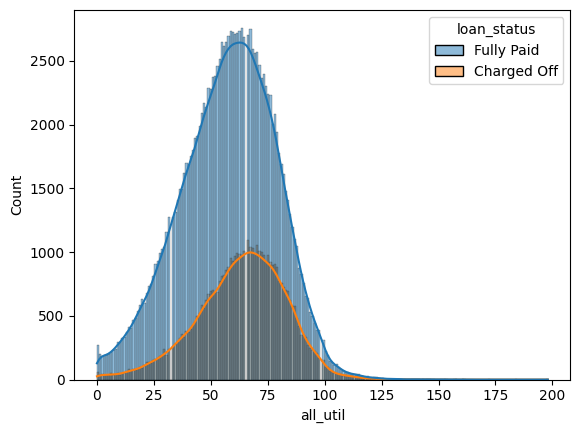

In [361]:
sns.histplot(data=df_modified, x='all_util', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='all_util'>

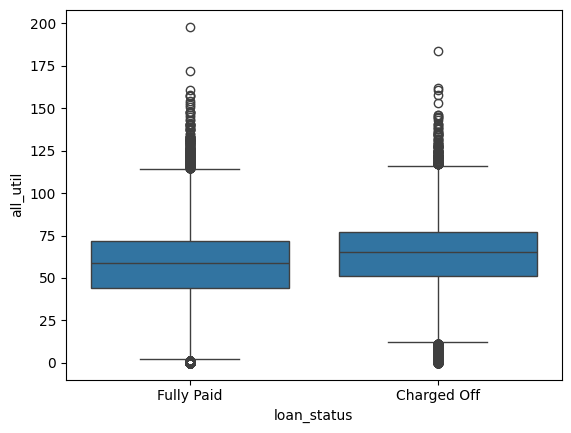

In [362]:
sns.boxplot(data=df_modified, x='loan_status', y='all_util')

Shape of the DataFrame where all_util is less than 115: (191015, 57)


<Axes: xlabel='all_util', ylabel='Count'>

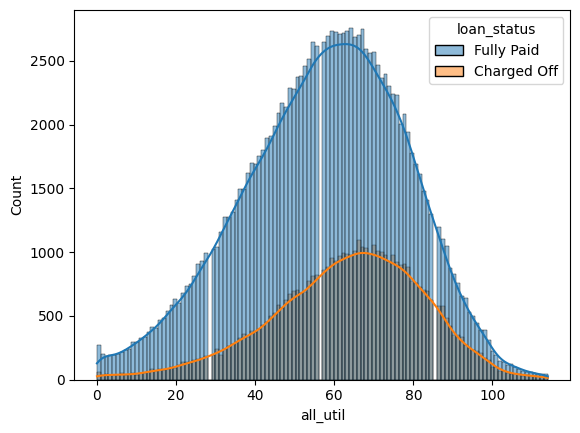

In [363]:
threshold = 115
filtered_df = df_modified[df_modified['all_util'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where all_util is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='all_util', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='all_util'>

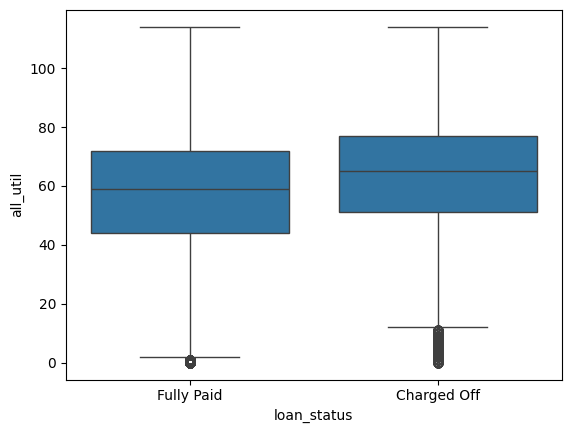

In [364]:
sns.boxplot(x='loan_status', y='all_util', data=filtered_df)

#### Imputation of missing values

In [365]:
df_modified['il_util'].fillna(df_modified['il_util'].mean(), inplace=True)

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_40344\2651419194.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modified['il_util'].fillna(df_modified['il_util'].mean(), inplace=True)


In [366]:
df_modified['mths_since_rcnt_il'].fillna(df_modified['mths_since_rcnt_il'].median(), inplace=True)

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_40344\3196497083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modified['mths_since_rcnt_il'].fillna(df_modified['mths_since_rcnt_il'].median(), inplace=True)


In [367]:
df_modified['revol_util'].fillna(df_modified['revol_util'].mean(), inplace=True)

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_40344\4125485613.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modified['revol_util'].fillna(df_modified['revol_util'].mean(), inplace=True)


In [368]:
df_modified['dti'].fillna(df_modified['dti'].mean(), inplace=True)

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_40344\2894254215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modified['dti'].fillna(df_modified['dti'].mean(), inplace=True)


In [369]:
df_modified['all_util'].fillna(df_modified['all_util'].mean(), inplace=True)

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_40344\30028396.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modified['all_util'].fillna(df_modified['all_util'].mean(), inplace=True)


In [370]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191470 entries, 8 to 759290
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   191470 non-null  int64  
 1   term                        191470 non-null  object 
 2   int_rate                    191470 non-null  float64
 3   installment                 191470 non-null  float64
 4   grade                       191470 non-null  object 
 5   sub_grade                   191470 non-null  object 
 6   emp_title                   179136 non-null  object 
 7   emp_length                  179244 non-null  object 
 8   home_ownership              191470 non-null  object 
 9   annual_inc                  191470 non-null  float64
 10  verification_status         191470 non-null  object 
 11  issue_d                     191470 non-null  object 
 12  loan_status                 191470 non-null  object 
 13  pymnt_plan         

#### Other numerical features

##### annual_inc

Shape of the DataFrame where Annual Income is less than 400000: (190792, 57)


<Axes: xlabel='annual_inc', ylabel='Count'>

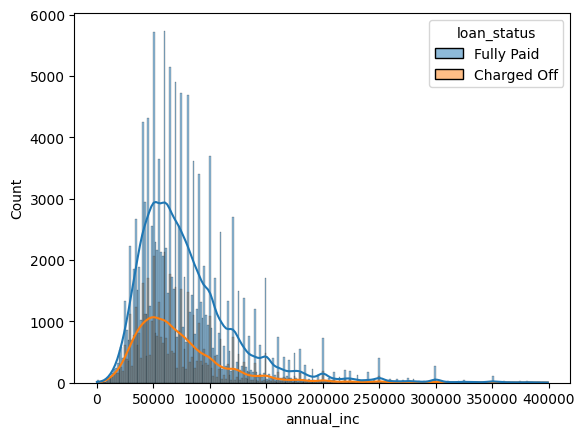

In [371]:
threshold = 400000
filtered_df = df_modified[df_modified['annual_inc'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where Annual Income is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='annual_inc', kde=True, hue='loan_status')

Shape of the DataFrame where Annual Income is less than 170000: (182811, 57)


<Axes: xlabel='annual_inc', ylabel='Count'>

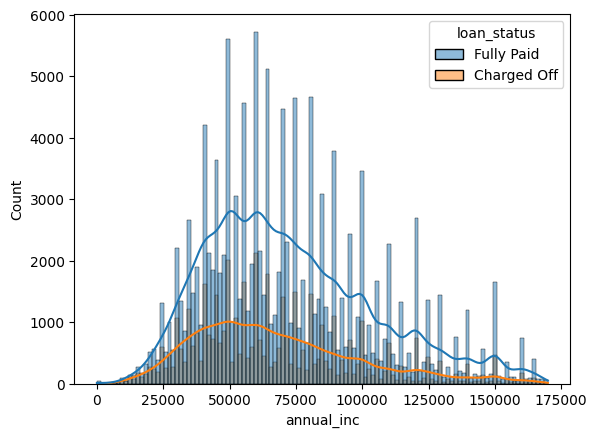

In [372]:
threshold = 170000
filtered_df = df_modified[df_modified['annual_inc'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where Annual Income is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='annual_inc', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='annual_inc'>

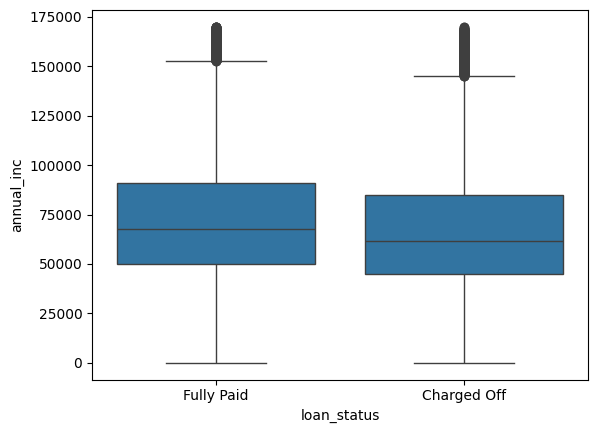

In [373]:
sns.boxplot(x='loan_status', y='annual_inc', data=filtered_df)

##### dti

Shape of the DataFrame where DTI is less than 999: (191465, 57)


<Axes: xlabel='dti', ylabel='Count'>

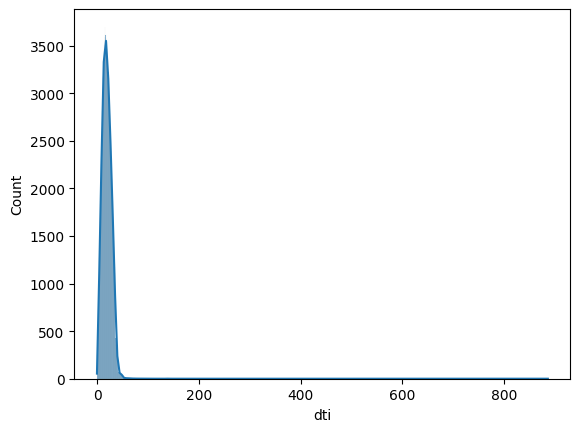

In [374]:
threshold = 999
filtered_df = df_modified[df_modified['dti'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where DTI is less than {threshold}:", filtered_df.shape)

sns.histplot(filtered_df['dti'], kde = True)

Shape of the DataFrame where DTI is less than 47: (190858, 57)


<Axes: xlabel='dti', ylabel='Count'>

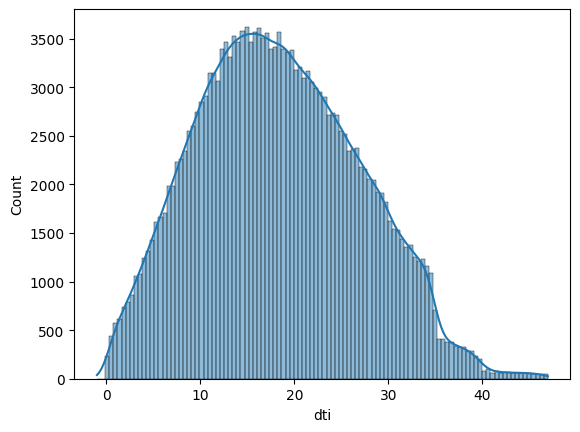

In [375]:
threshold = 47
filtered_df = df_modified[df_modified['dti'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where DTI is less than {threshold}:", filtered_df.shape)

sns.histplot(filtered_df['dti'], kde = True)

<Axes: xlabel='loan_status', ylabel='dti'>

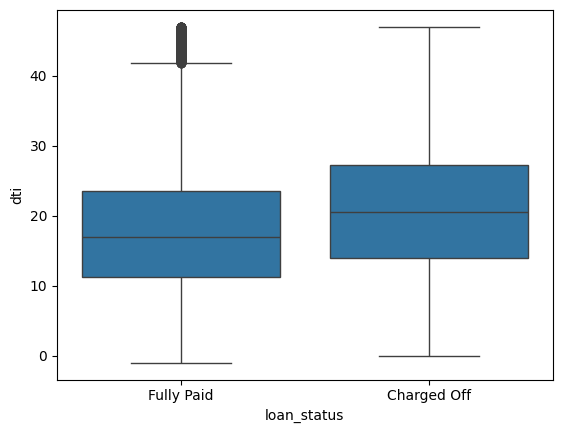

In [376]:
sns.boxplot(x='loan_status', y='dti', data=filtered_df)

In [377]:
df_modified['dti'] = df_modified['dti'].fillna(df_modified['dti'].mean())

##### inq_last_6mths

In [378]:
null_inq_last_6mths_df = df_modified[df_modified['inq_last_6mths'].isnull()]
null_inq_last_6mths_df['loan_status'].value_counts()

Series([], Name: count, dtype: int64)

In [379]:
df_modified.loc[:, 'inq_last_6mths'] = df_modified['inq_last_6mths'].fillna(0)

Shape of the DataFrame where inq_last_6mths is less than 5: (190712, 57)


<Axes: xlabel='inq_last_6mths', ylabel='Count'>

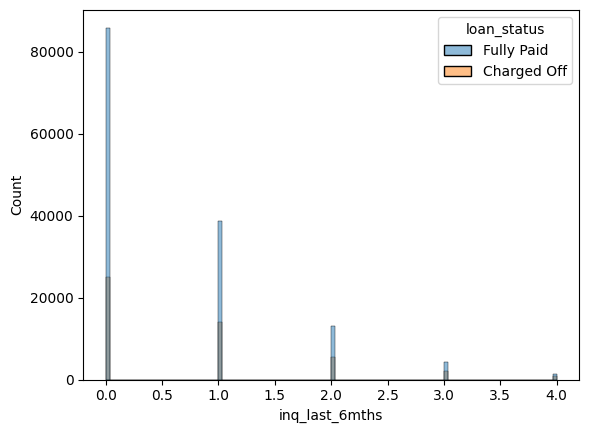

In [380]:
threshold = 5 
filtered_df = df_modified[df_modified['inq_last_6mths'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where inq_last_6mths is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='inq_last_6mths', hue='loan_status')

##### revol_util

<Axes: xlabel='revol_util', ylabel='Count'>

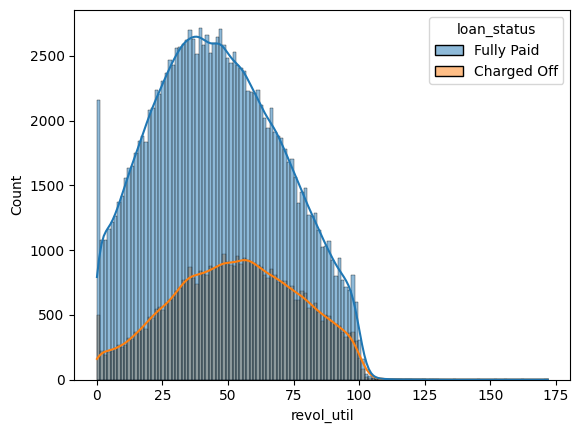

In [381]:
sns.histplot(data=df_modified, x='revol_util', kde=True, hue='loan_status')

Shape of the DataFrame where revol_util is less than 110: (191425, 57)


<Axes: xlabel='revol_util', ylabel='Count'>

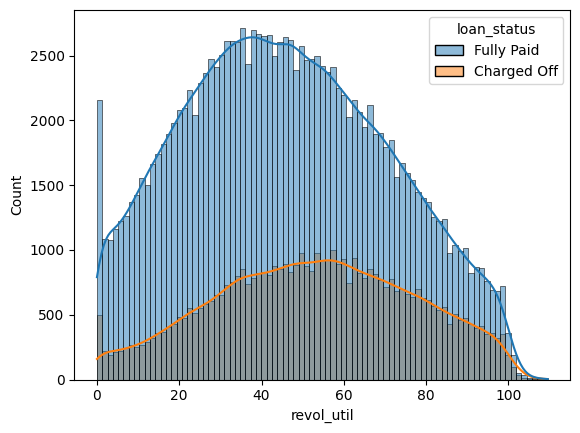

In [382]:
threshold = 110
filtered_df = df_modified[df_modified['revol_util'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where revol_util is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='revol_util', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='revol_util'>

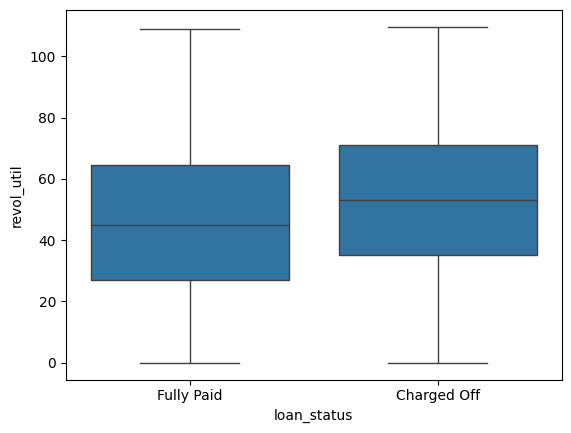

In [383]:
sns.boxplot(x='loan_status', y='revol_util', data=filtered_df)

##### loan_amnt

Shape of the DataFrame where loan_amnt is less than 40000: (190020, 57)


<Axes: xlabel='loan_amnt', ylabel='Count'>

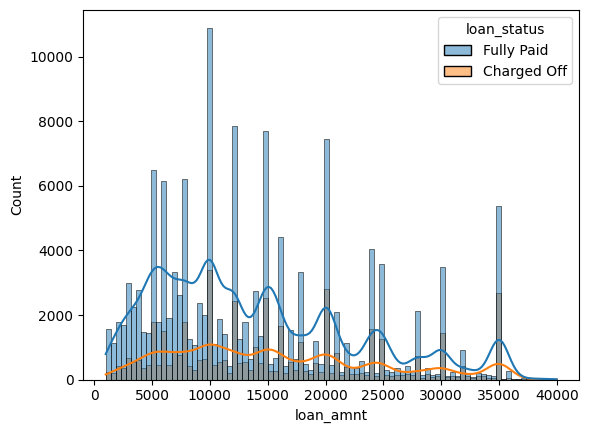

In [384]:
threshold = 40000
filtered_df = df_modified[df_modified['loan_amnt'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where loan_amnt is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='loan_amnt', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

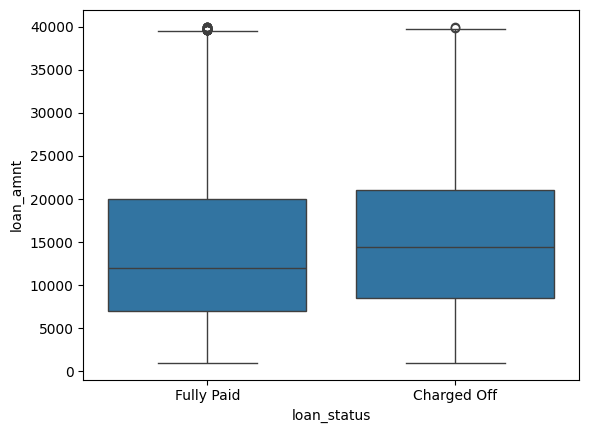

In [385]:
sns.boxplot(x='loan_status', y='loan_amnt', data=filtered_df)

##### int_rate

Shape of the DataFrame where int_rate is less than 31: (191470, 57)


<Axes: xlabel='int_rate', ylabel='Count'>

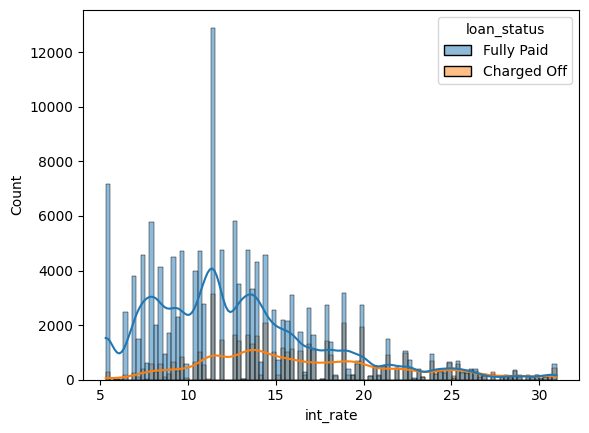

In [386]:
threshold = 31
filtered_df = df_modified[df_modified['int_rate'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where int_rate is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='int_rate', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='int_rate'>

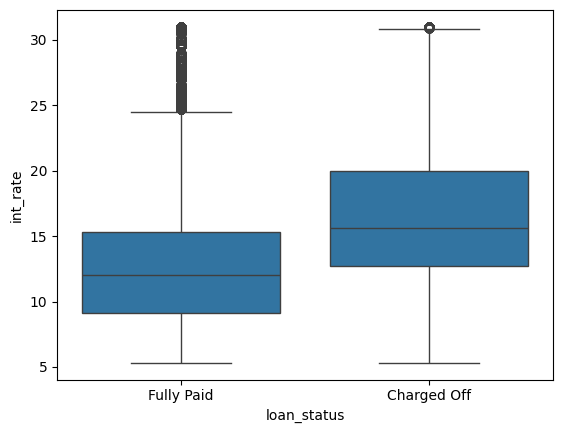

In [387]:
sns.boxplot(x='loan_status', y='int_rate', data=filtered_df)

##### delinq_2yrs

In [388]:
df_modified['delinq_2yrs'].value_counts()

delinq_2yrs
0     152608
1      25547
2       7553
3       2820
4       1293
5        634
6        390
7        216
8        130
9         86
10        56
11        45
12        29
14        19
13        14
15        10
17         5
16         4
20         4
21         3
19         2
18         2
Name: count, dtype: int64

##### open_acc

Shape of the DataFrame where open_acc is less than 30: (189153, 57)


<Axes: xlabel='open_acc', ylabel='Count'>

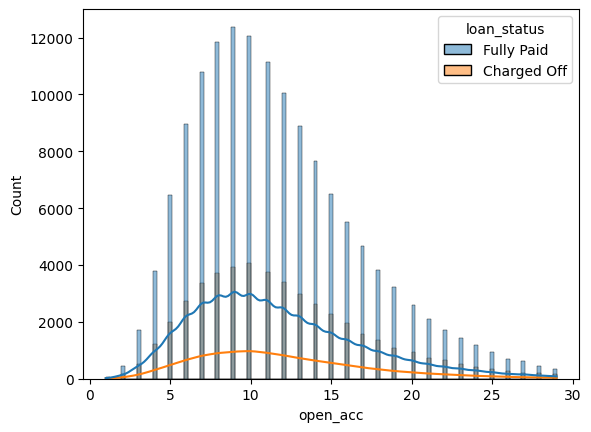

In [389]:
threshold = 30
filtered_df = df_modified[df_modified['open_acc'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where open_acc is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='open_acc', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='open_acc'>

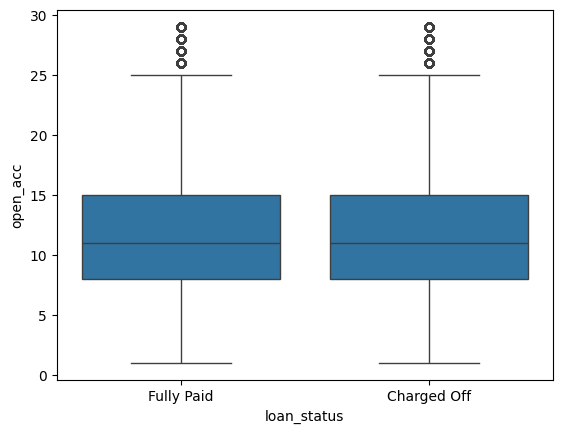

In [390]:
sns.boxplot(x='loan_status', y='open_acc', data=filtered_df)

In [391]:
grouped = filtered_df.groupby(['open_acc', 'loan_status']).size().unstack(fill_value=0)

# Calculate ratio for each loan status within each open_acc type
ratio_df = grouped.div(grouped.sum(axis=1), axis=0)

# Print the ratio dataframe
print("Ratio of loan status grouped by each open_acc type:")
print(ratio_df)

Ratio of loan status grouped by each open_acc type:
loan_status  Charged Off  Fully Paid
open_acc                            
1               0.269841    0.730159
2               0.270227    0.729773
3               0.233244    0.766756
4               0.243659    0.756341
5               0.234111    0.765889
6               0.234115    0.765885
7               0.238011    0.761989
8               0.239520    0.760480
9               0.240120    0.759880
10              0.251645    0.748355
11              0.251611    0.748389
12              0.253286    0.746714
13              0.250274    0.749726
14              0.255474    0.744526
15              0.260098    0.739902
16              0.261621    0.738379
17              0.253884    0.746116
18              0.262459    0.737541
19              0.249244    0.750756
20              0.267330    0.732670
21              0.260501    0.739499
22              0.275964    0.724036
23              0.266462    0.733538
24              0.25837

In [392]:
df_modified = df_modified.drop(columns = ['open_acc'])

##### pub_rec

<Axes: xlabel='pub_rec', ylabel='count'>

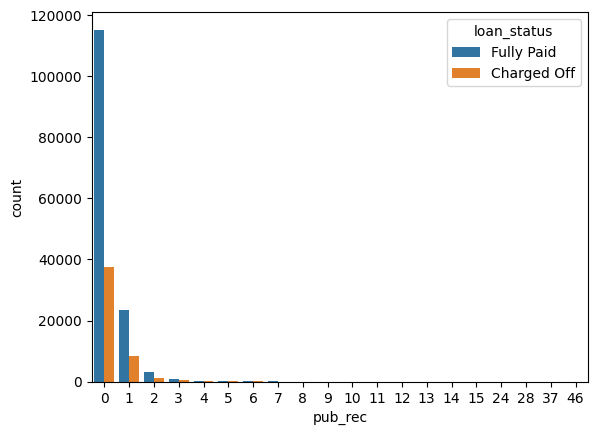

In [393]:
sns.countplot(data=df_modified, x='pub_rec', hue='loan_status')

Shape of the DataFrame where pub_rec is less than 8: (191393, 56)


<Axes: xlabel='pub_rec', ylabel='Count'>

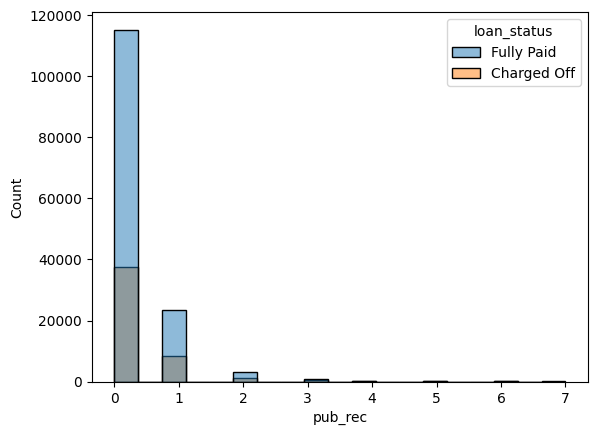

In [394]:
threshold = 8
filtered_df = df_modified[df_modified['pub_rec'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where pub_rec is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='pub_rec', hue='loan_status')

In [395]:
grouped = filtered_df.groupby(['pub_rec', 'loan_status']).size().unstack(fill_value=0)

# Calculate ratio for each loan status within each pub_rec type
ratio_df = grouped.div(grouped.sum(axis=1), axis=0)

# Print the ratio dataframe
print("Ratio of loan status grouped by each pub_rec type:")
print(ratio_df)

Ratio of loan status grouped by each pub_rec type:
loan_status  Charged Off  Fully Paid
pub_rec                             
0               0.244806    0.755194
1               0.264844    0.735156
2               0.283648    0.716352
3               0.263429    0.736571
4               0.297959    0.702041
5               0.307692    0.692308
6               0.298246    0.701754
7               0.260870    0.739130


In [396]:
df_modified = df_modified.drop(columns = ['pub_rec'])

##### total_acc	

<Axes: xlabel='total_acc', ylabel='Count'>

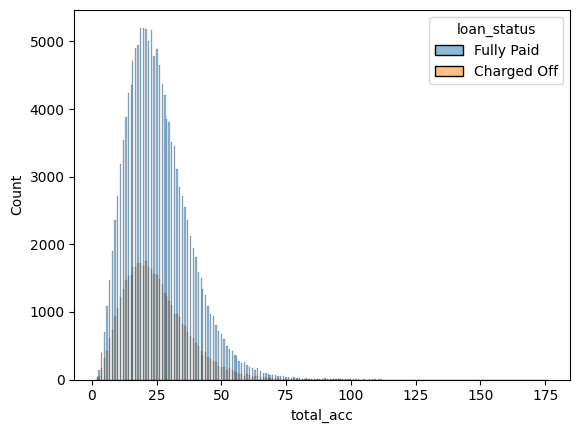

In [397]:
sns.histplot(data=df_modified, x='total_acc', hue='loan_status')

Shape of the DataFrame where totoal_acc is less than 70: (190562, 55)


<Axes: xlabel='total_acc', ylabel='Count'>

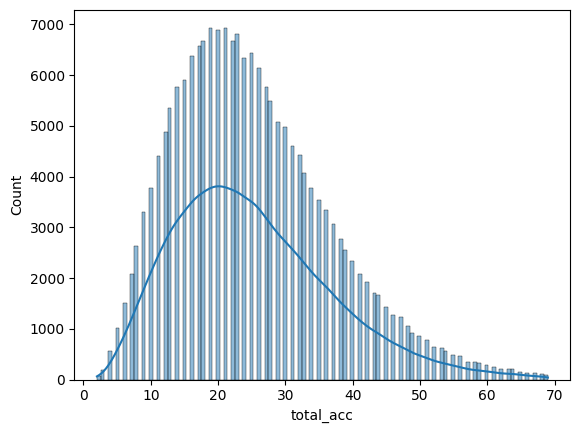

In [398]:
threshold = 70
filtered_df = df_modified[df_modified['total_acc'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where totoal_acc is less than {threshold}:", filtered_df.shape)

sns.histplot(filtered_df['total_acc'], kde = True)

<Axes: xlabel='loan_status', ylabel='total_acc'>

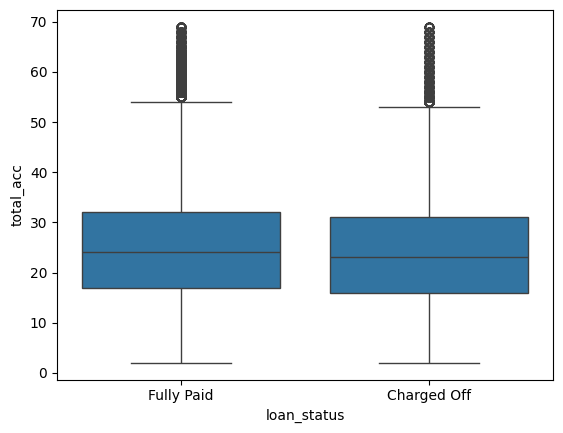

In [399]:
sns.boxplot(x='loan_status', y='total_acc', data=filtered_df)

##### total_pymnt

<Axes: xlabel='total_pymnt', ylabel='Count'>

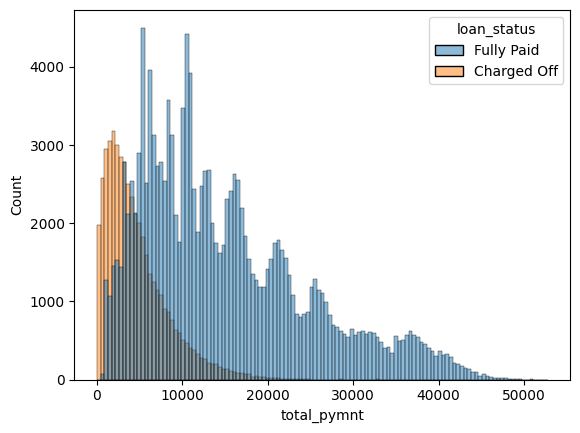

In [400]:
sns.histplot(data=df_modified, x='total_pymnt', hue='loan_status')

<Axes: xlabel='loan_status', ylabel='total_pymnt'>

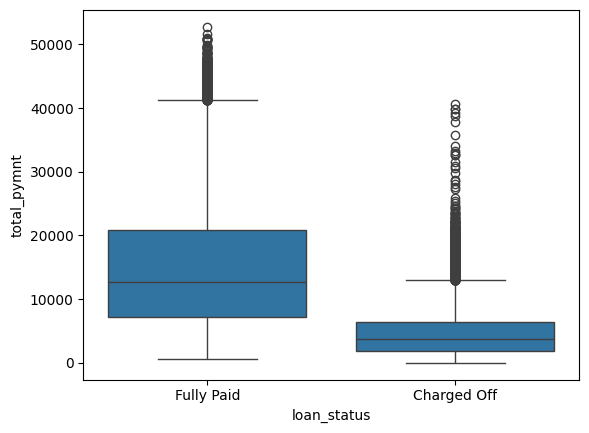

In [401]:
sns.boxplot(x='loan_status', y='total_pymnt', data=filtered_df)

In [402]:
df_modified['total_pymnt_log'] = np.log1p(df_modified['total_pymnt'])

Shape of the DataFrame where total_pymnt_log is less than 70: (189626, 56)


<Axes: xlabel='total_pymnt_log', ylabel='Count'>

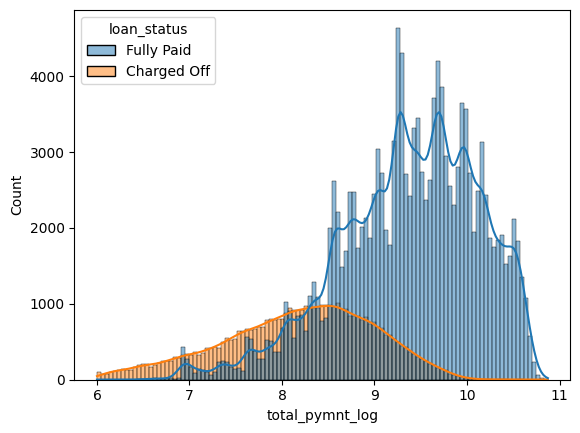

In [403]:
lower_threshold = 6
filtered_df = df_modified[lower_threshold < df_modified['total_pymnt_log']]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where total_pymnt_log is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='total_pymnt_log', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='total_pymnt_log'>

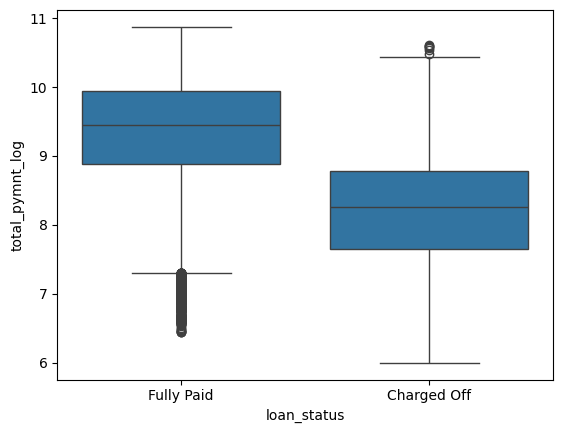

In [404]:
sns.boxplot(x='loan_status', y='total_pymnt_log', data=filtered_df)

In [405]:
df_modified = df_modified.drop(columns = ['total_pymnt'])

##### total_rec_int

Shape of the DataFrame where total_rec_int is less than 6000: (188008, 55)


<Axes: xlabel='total_rec_int', ylabel='Count'>

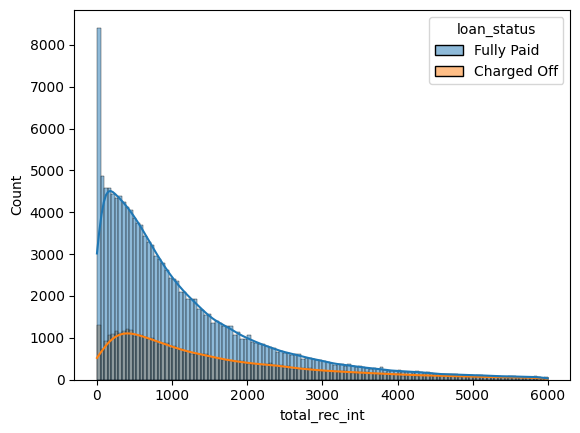

In [406]:
threshold = 6000
filtered_df = df_modified[df_modified['total_rec_int'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where total_rec_int is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='total_rec_int', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='total_rec_int'>

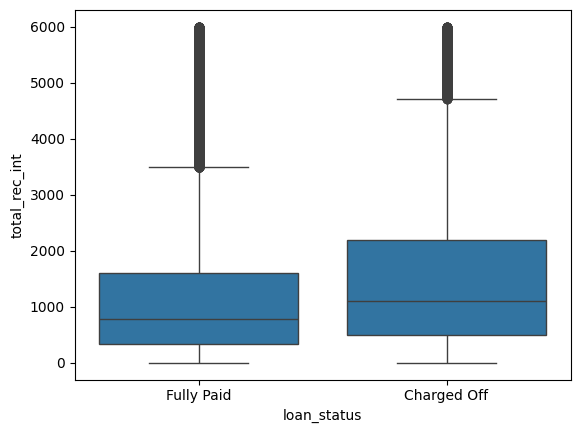

In [407]:
sns.boxplot(x='loan_status', y='total_rec_int', data=filtered_df)

In [408]:
df_modified['total_rec_int_log'] = np.log1p(df_modified['total_rec_int'])

<Axes: xlabel='total_rec_int_log', ylabel='Count'>

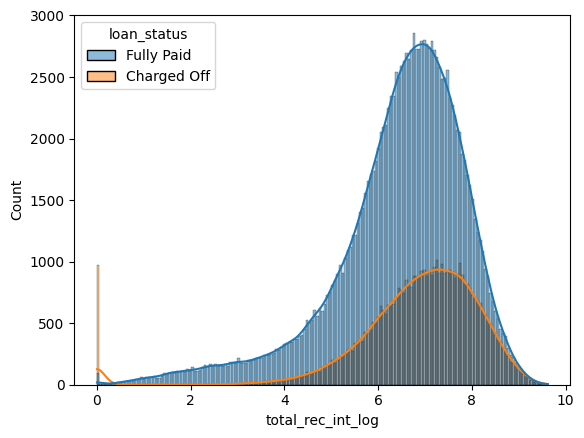

In [409]:
sns.histplot(data=df_modified, x='total_rec_int_log', kde=True, hue='loan_status')

Shape of the DataFrame where total_rec_int_log is more than 3: (185616, 56)


<Axes: xlabel='total_rec_int_log', ylabel='Count'>

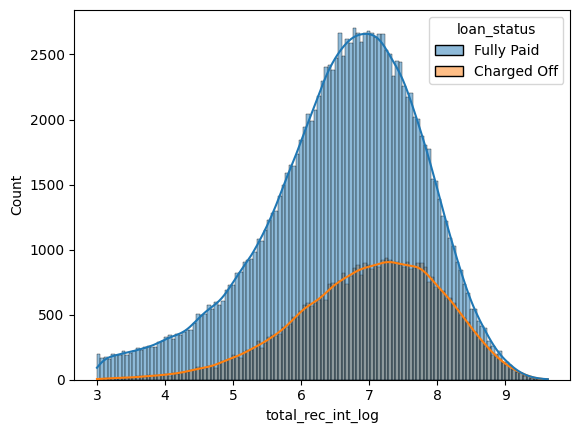

In [410]:
lower_threshold = 3
filtered_df = df_modified[lower_threshold < df_modified['total_rec_int_log']]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where total_rec_int_log is more than {lower_threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='total_rec_int_log', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='total_rec_int_log'>

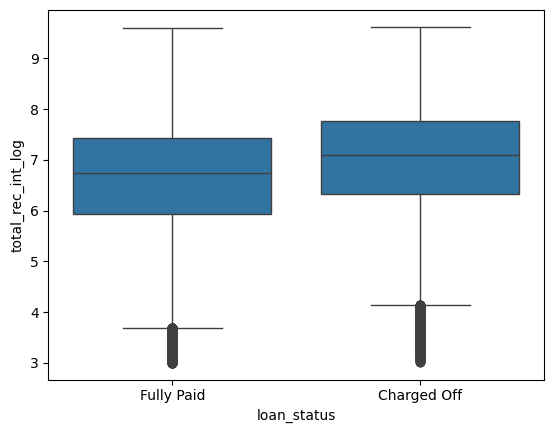

In [411]:
sns.boxplot(x='loan_status', y='total_rec_int_log', data=filtered_df)

In [412]:
df_modified = df_modified.drop(columns = ['total_rec_int'])

##### total_rec_late_fee

In [413]:
df_modified['total_rec_late_fee'].value_counts()

total_rec_late_fee
0.000000      184093
15.000000       1729
30.000000        305
45.000000         95
10.000000         28
               ...  
29.980000          1
30.340000          1
107.800000         1
50.260001          1
60.480000          1
Name: count, Length: 2973, dtype: int64

<Axes: xlabel='total_rec_late_fee', ylabel='count'>

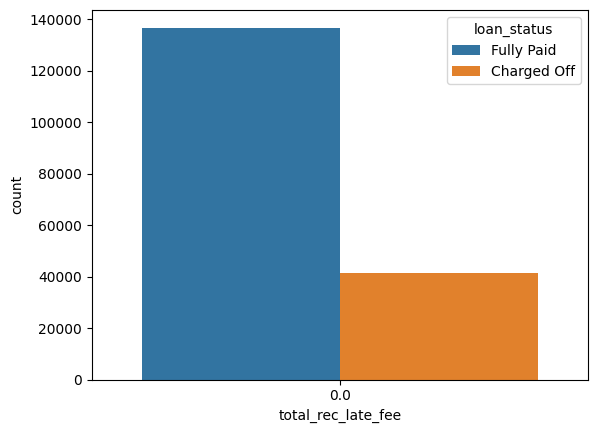

In [414]:
filtered_df_non_zero = filtered_df[filtered_df['total_rec_late_fee'] == 0]

sns.countplot(data=filtered_df_non_zero, x='total_rec_late_fee', hue='loan_status')

<Axes: xlabel='total_rec_late_fee', ylabel='count'>

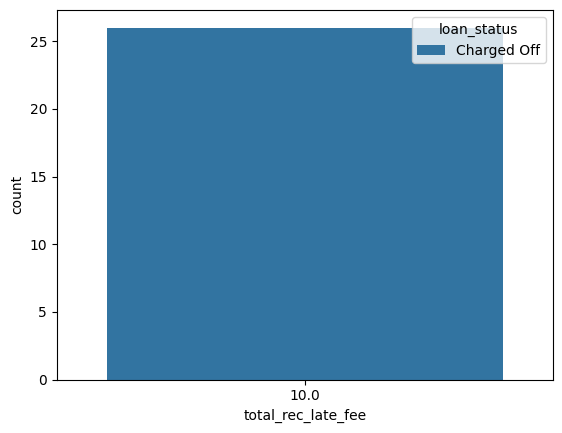

In [415]:
filtered_df_non_zero = filtered_df[filtered_df['total_rec_late_fee'] == 10]

sns.countplot(data=filtered_df_non_zero, x='total_rec_late_fee', hue='loan_status')

<Axes: xlabel='total_rec_late_fee', ylabel='count'>

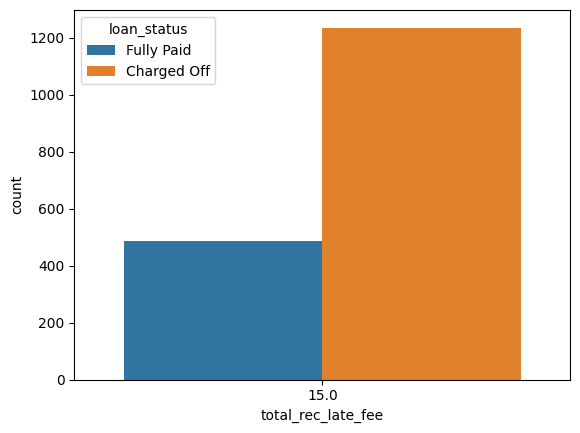

In [416]:
filtered_df_non_zero = filtered_df[filtered_df['total_rec_late_fee'] == 15]

sns.countplot(data=filtered_df_non_zero, x='total_rec_late_fee', hue='loan_status')

<Axes: xlabel='total_rec_late_fee', ylabel='count'>

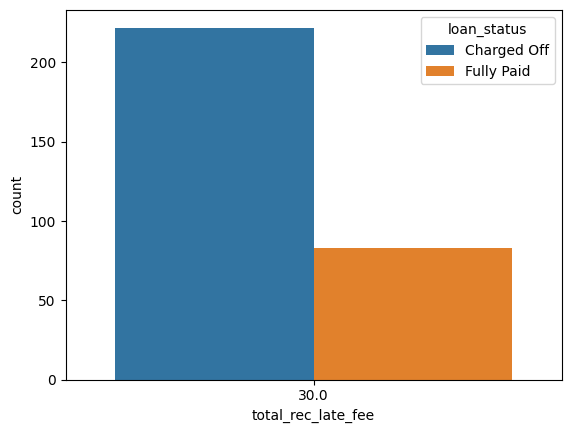

In [417]:
filtered_df_non_zero = filtered_df[filtered_df['total_rec_late_fee'] == 30]

sns.countplot(data=filtered_df_non_zero, x='total_rec_late_fee', hue='loan_status')

In [418]:
df_modified = df_modified.drop(columns=['total_rec_late_fee'])

##### collections_12_mths_ex_med

In [419]:
df_modified['collections_12_mths_ex_med'].value_counts()

collections_12_mths_ex_med
0     187751
1       3466
2        214
3         18
4          9
6          5
5          4
12         2
7          1
Name: count, dtype: int64

In [420]:
df_modified.groupby('loan_status')['collections_12_mths_ex_med'].value_counts()

loan_status  collections_12_mths_ex_med
Charged Off  0                              46588
             1                               1093
             2                                 76
             3                                  6
             4                                  3
             6                                  2
             5                                  1
Fully Paid   0                             141163
             1                               2373
             2                                138
             3                                 12
             4                                  6
             5                                  3
             6                                  3
             12                                 2
             7                                  1
Name: count, dtype: int64

In [421]:
df_modified = df_modified.drop(columns = ['collections_12_mths_ex_med'])

##### revol_bal_log

<Axes: xlabel='revol_bal', ylabel='Count'>

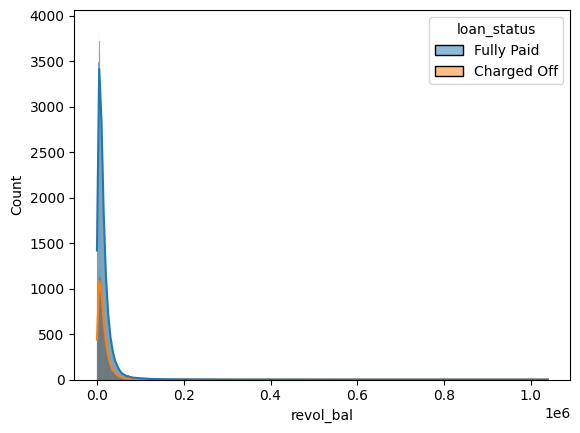

In [422]:
sns.histplot(data=df_modified, x='revol_bal', kde=True, hue='loan_status')

Shape of the DataFrame where revol_bal is less than 75000: (188094, 53)


<Axes: xlabel='revol_bal', ylabel='Count'>

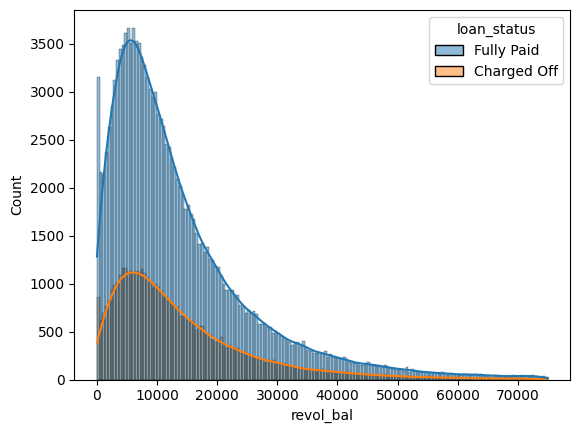

In [423]:
threshold = 75000
filtered_df = df_modified[df_modified['revol_bal'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where revol_bal is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='revol_bal', kde=True, hue='loan_status')

In [424]:
skewness = filtered_df['revol_bal'].skew()
print(skewness)

1.7486042498752303


Skewness after log transformation of revol_bal: -2.51


<Axes: xlabel='revol_bal_log', ylabel='Count'>

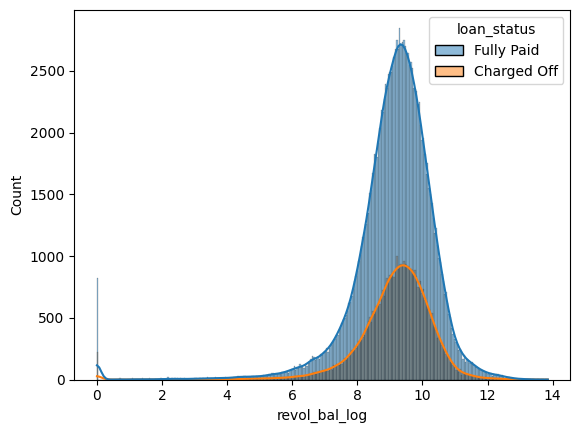

In [425]:
df_modified['revol_bal_log'] = np.log1p(df_modified['revol_bal'])
log_skewness = df_modified['revol_bal_log'].skew()
print(f"Skewness after log transformation of revol_bal: {log_skewness:.2f}")

sns.histplot(data=df_modified, x='revol_bal_log', kde=True, hue='loan_status')

Shape of the DataFrame where revol_bal_log is between 5 and 13: (189145, 54)


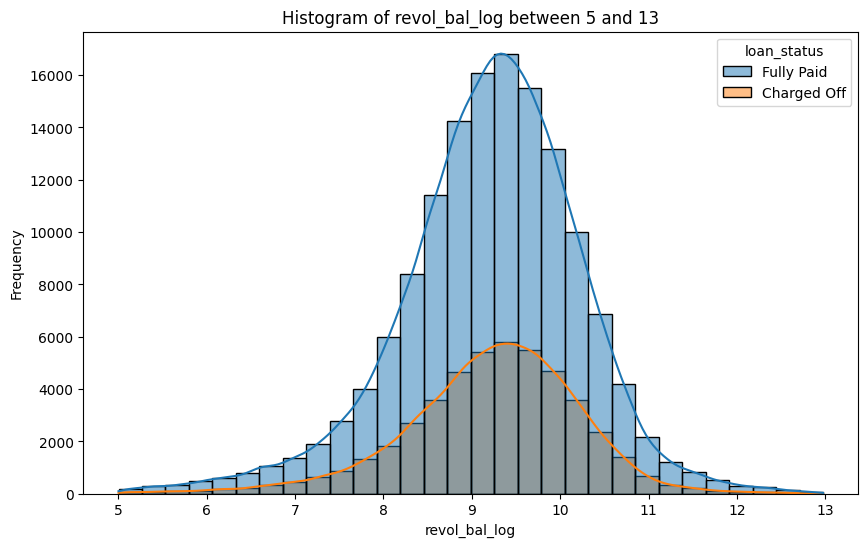

In [426]:
lower_threshold = 5
upper_threshold = 13

# Filter the DataFrame between the thresholds
filtered_df = df_modified[(df_modified['revol_bal_log'] >= lower_threshold) & (df_modified['revol_bal_log'] < upper_threshold)]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where revol_bal_log is between {lower_threshold} and {upper_threshold}:", filtered_df.shape)

# Plot the histogram with KDE and hue
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='revol_bal_log', kde=True, hue='loan_status', bins=30)
plt.title(f'Histogram of revol_bal_log between {lower_threshold} and {upper_threshold}')
plt.xlabel('revol_bal_log')
plt.ylabel('Frequency')
plt.show()

In [427]:
df_modified = df_modified.drop(columns = ['revol_bal'])

##### out_prncp

In [428]:
df_modified['out_prncp'].describe()

count    191470.000000
mean       1064.680094
std        3949.068352
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       40000.000000
Name: out_prncp, dtype: float64

In [429]:
df_modified['out_prncp'].value_counts()

out_prncp
0.00        167954
3796.02         55
5693.91         51
3906.93         51
3952.73         51
             ...  
4720.15          1
2056.16          1
30926.97         1
17267.88         1
7784.34          1
Name: count, Length: 18811, dtype: int64

In [430]:
df_modified = df_modified.drop(columns = ['out_prncp'])

##### total_rec_prncp

<Axes: xlabel='total_rec_prncp', ylabel='Count'>

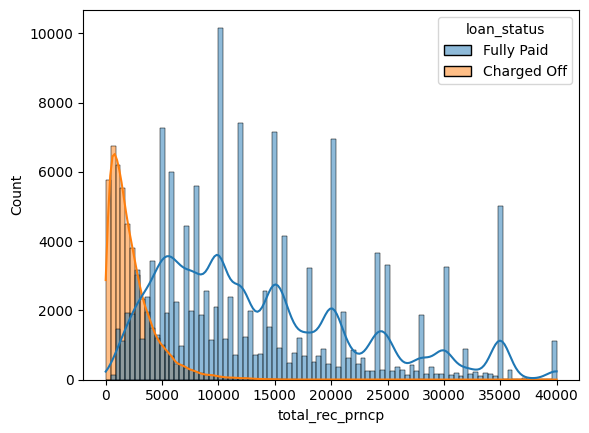

In [431]:
sns.histplot(data=df_modified, x='total_rec_prncp', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='total_rec_prncp'>

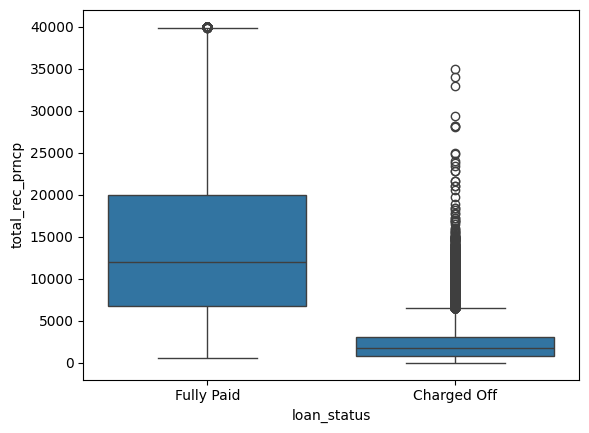

In [432]:
sns.boxplot(x='loan_status', y='total_rec_prncp', data=df_modified)

In [433]:
df_modified['total_rec_prncp_log'] = np.log1p(df_modified['total_rec_prncp'])

<Axes: xlabel='total_rec_prncp_log', ylabel='Count'>

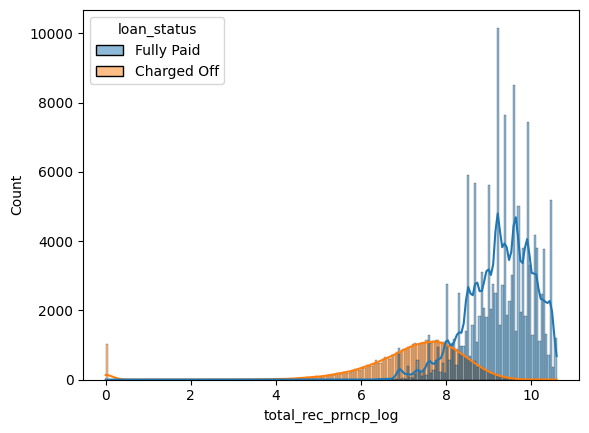

In [434]:
sns.histplot(data=df_modified, x='total_rec_prncp_log', kde=True, hue='loan_status')

Shape of the DataFrame where total_rec_prncp_log is more than 4: (190349, 53)


<Axes: xlabel='total_rec_prncp_log', ylabel='Count'>

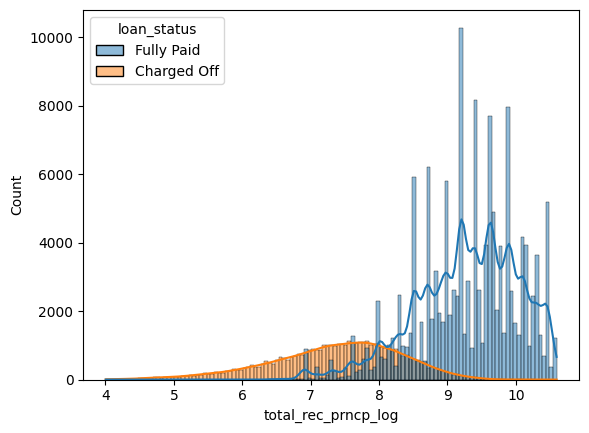

In [435]:
lower_threshold = 4
filtered_df = df_modified[lower_threshold < df_modified['total_rec_prncp_log']]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where total_rec_prncp_log is more than {lower_threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='total_rec_prncp_log', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='total_rec_prncp_log'>

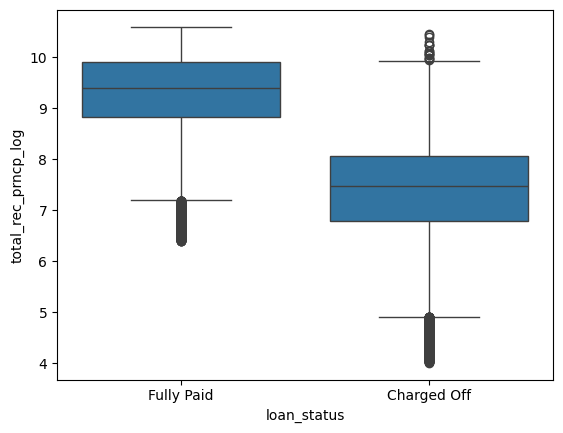

In [436]:
sns.boxplot(x='loan_status', y='total_rec_prncp_log', data=filtered_df)

In [437]:
df_modified = df_modified.drop(columns = ['total_rec_prncp'])

##### recoveries

In [438]:
df_modified['recoveries'].value_counts()

recoveries
0.00       175465
50.00         154
100.00        132
200.00         78
150.00         56
            ...  
459.67          1
1277.83         1
1758.60         1
1227.94         1
852.31          1
Name: count, Length: 14658, dtype: int64

In [439]:
df_modified = df_modified.drop(columns = ['recoveries'])

##### collection_recovery_fee

In [440]:
df_modified['collection_recovery_fee'].value_counts()

collection_recovery_fee
0.0000      175477
9.0000         130
18.0000         96
36.0000         58
27.0000         46
             ...  
192.0528         1
568.4040         1
591.6888         1
329.1336         1
153.4158         1
Name: count, Length: 14945, dtype: int64

In [441]:
df_modified = df_modified.drop(columns = ['collection_recovery_fee'])

##### last_pymnt_amnt

<Axes: xlabel='last_pymnt_amnt', ylabel='Count'>

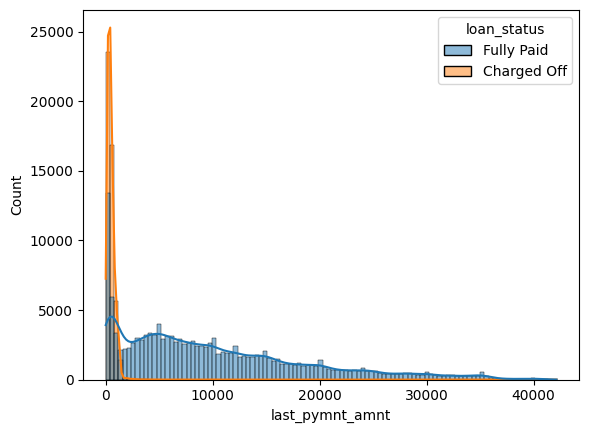

In [442]:
sns.histplot(data=df_modified, x='last_pymnt_amnt', kde=True, hue='loan_status')

In [443]:
df_modified['last_pymnt_amnt_log'] = np.log1p(df_modified['last_pymnt_amnt'])

<Axes: xlabel='last_pymnt_amnt_log', ylabel='Count'>

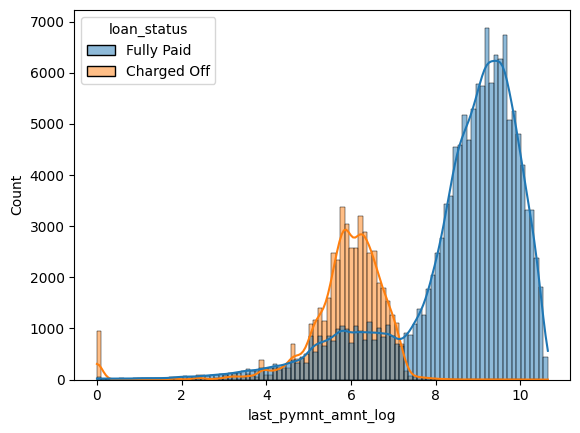

In [444]:
sns.histplot(data=df_modified, x='last_pymnt_amnt_log', kde=True, hue='loan_status')

Shape of the DataFrame where last_pymnt_amnt_log is more than 3: (189087, 51)


<Axes: xlabel='last_pymnt_amnt_log', ylabel='Count'>

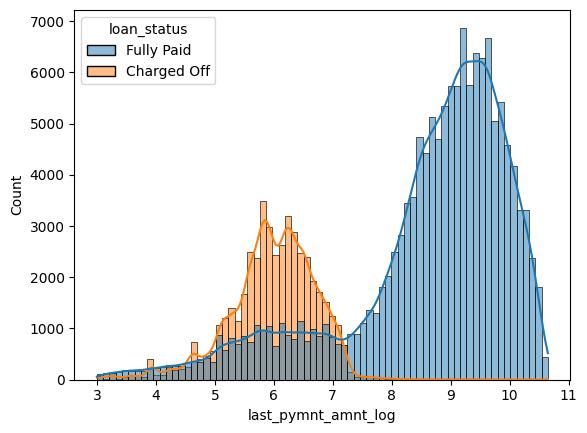

In [445]:
lower_threshold = 3
filtered_df = df_modified[lower_threshold < df_modified['last_pymnt_amnt_log']]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where last_pymnt_amnt_log is more than {lower_threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='last_pymnt_amnt_log', kde=True, hue='loan_status')

In [446]:
df_modified = df_modified.drop(columns = ['last_pymnt_amnt'])

##### acc_now_delinq	

In [447]:
df_modified['acc_now_delinq'].value_counts()

acc_now_delinq
0    190319
1      1096
2        49
3         5
4         1
Name: count, dtype: int64

In [448]:
df_modified.groupby('loan_status')['acc_now_delinq'].value_counts()

loan_status  acc_now_delinq
Charged Off  0                  47436
             1                    310
             2                     22
             3                      1
Fully Paid   0                 142883
             1                    786
             2                     27
             3                      4
             4                      1
Name: count, dtype: int64

In [449]:
df_modified = df_modified.drop(columns = ['acc_now_delinq'])

##### tot_coll_amt

In [450]:
df_modified['tot_coll_amt'].value_counts()

tot_coll_amt
0.0       159067
50.0         347
100.0        338
75.0         221
150.0        212
           ...  
4478.0         1
3280.0         1
7887.0         1
7408.0         1
2085.0         1
Name: count, Length: 5690, dtype: int64

In [451]:
df_modified.groupby('loan_status')['tot_coll_amt'].value_counts()

loan_status  tot_coll_amt
Charged Off  0.0             39066
             50.0              113
             100.0              85
             75.0               64
             200.0              56
                             ...  
Fully Paid   119428.0            1
             132776.0            1
             161045.0            1
             173380.0            1
             199433.0            1
Name: count, Length: 7734, dtype: int64

In [452]:
df_modified = df_modified.drop(columns = ['tot_coll_amt'])

##### tot_cur_bal

<Axes: xlabel='tot_cur_bal', ylabel='Count'>

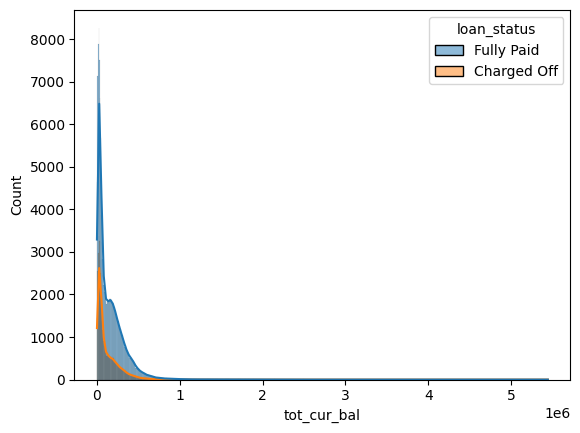

In [453]:
sns.histplot(data=df_modified, x='tot_cur_bal', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='tot_cur_bal'>

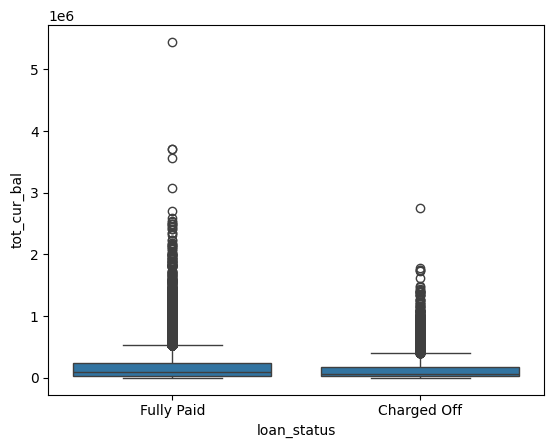

In [454]:
sns.boxplot(x='loan_status', y='tot_cur_bal', data=df_modified)

In [455]:
df_modified['tot_cur_bal_log'] = np.log1p(df_modified['tot_cur_bal'])

Shape of the DataFrame where tot_cur_bal_log is more than 7.8: (189924, 49)


<Axes: xlabel='tot_cur_bal_log', ylabel='Count'>

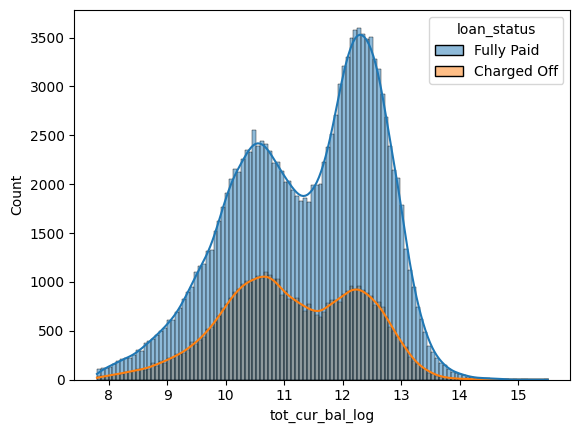

In [456]:
lower_threshold = 7.8
filtered_df = df_modified[lower_threshold < df_modified['tot_cur_bal_log']]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where tot_cur_bal_log is more than {lower_threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='tot_cur_bal_log', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='tot_cur_bal_log'>

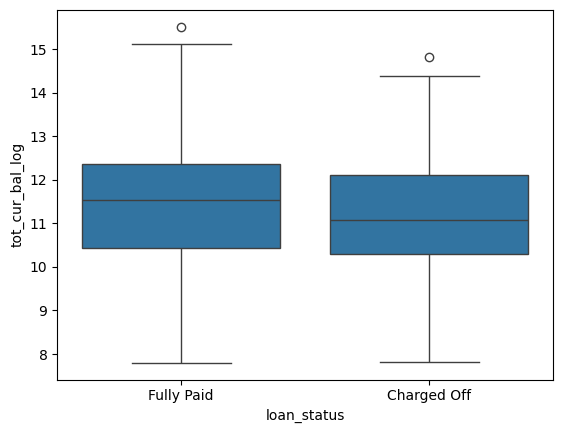

In [457]:
sns.boxplot(x='loan_status', y='tot_cur_bal_log', data=filtered_df)

In [458]:
df_modified = df_modified.drop(columns = ['tot_cur_bal'])

##### open_acc_6m

In [459]:
df_modified['open_acc_6m'].value_counts()

open_acc_6m
0.0     73903
1.0     60904
2.0     32932
3.0     14284
4.0      5727
5.0      2156
6.0       906
7.0       366
8.0       151
9.0        74
10.0       29
11.0       18
12.0       11
14.0        3
16.0        2
13.0        1
18.0        1
17.0        1
15.0        1
Name: count, dtype: int64

In [460]:
grouped = df_modified.groupby(['open_acc_6m', 'loan_status']).size().unstack(fill_value=0)

# Calculate percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Display the counts and percentages
print("Counts:\n", grouped)
print("\nPercentages:\n", percentages.round(2))

Counts:
 loan_status  Charged Off  Fully Paid
open_acc_6m                         
0.0                16600       57303
1.0                14943       45961
2.0                 8976       23956
3.0                 4161       10123
4.0                 1849        3878
5.0                  722        1434
6.0                  300         606
7.0                  114         252
8.0                   58          93
9.0                   23          51
10.0                   8          21
11.0                   8          10
12.0                   3           8
13.0                   0           1
14.0                   1           2
15.0                   0           1
16.0                   1           1
17.0                   1           0
18.0                   1           0

Percentages:
 loan_status  Charged Off  Fully Paid
open_acc_6m                         
0.0                22.46       77.54
1.0                24.54       75.46
2.0                27.26       72.74
3.0           

##### open_il_12m

In [461]:
df_modified['open_il_12m'].value_counts()

open_il_12m
0.0     89753
1.0     61977
2.0     26719
3.0      8632
4.0      2864
5.0       934
6.0       364
7.0       115
8.0        49
9.0        26
10.0       16
11.0       10
13.0        4
12.0        3
21.0        1
25.0        1
14.0        1
20.0        1
Name: count, dtype: int64

In [462]:
grouped = df_modified.groupby(['open_il_12m', 'loan_status']).size().unstack(fill_value=0)

# Calculate percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Display the counts and percentages
print("Counts:\n", grouped)
print("\nPercentages:\n", percentages.round(2))

Counts:
 loan_status  Charged Off  Fully Paid
open_il_12m                         
0.0                20316       69437
1.0                15800       46177
2.0                 7524       19195
3.0                 2744        5888
4.0                  881        1983
5.0                  299         635
6.0                  128         236
7.0                   38          77
8.0                   16          33
9.0                    9          17
10.0                   5          11
11.0                   4           6
12.0                   1           2
13.0                   2           2
14.0                   0           1
20.0                   0           1
21.0                   1           0
25.0                   1           0

Percentages:
 loan_status  Charged Off  Fully Paid
open_il_12m                         
0.0                22.64       77.36
1.0                25.49       74.51
2.0                28.16       71.84
3.0                31.79       68.21
4.0           

In [463]:
df_modified = df_modified.drop(columns = ['open_il_12m'])

##### open_il_24m

In [464]:
grouped = df_modified.groupby(['open_il_24m', 'loan_status']).size().unstack(fill_value=0)

# Calculate percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Display the counts and percentages
print("Counts:\n", grouped)
print("\nPercentages:\n", percentages.round(2))

Counts:
 loan_status  Charged Off  Fully Paid
open_il_24m                         
0.0                 9285       32364
1.0                13348       42827
2.0                10585       31422
3.0                 6401       17788
4.0                 3684        9364
5.0                 2059        4829
6.0                 1076        2367
7.0                  606        1206
8.0                  330         691
9.0                  147         348
10.0                 110         185
11.0                  52         115
12.0                  32          69
13.0                  24          49
14.0                  10          26
15.0                   6          15
16.0                   5          11
17.0                   1           7
18.0                   0           7
19.0                   1           2
20.0                   4           1
21.0                   0           2
22.0                   0           2
23.0                   1           0
24.0                   0     

In [465]:
df_modified.groupby('loan_status')['open_il_24m'].value_counts()

loan_status  open_il_24m
Charged Off  1.0            13348
             2.0            10585
             0.0             9285
             3.0             6401
             4.0             3684
             5.0             2059
             6.0             1076
             7.0              606
             8.0              330
             9.0              147
             10.0             110
             11.0              52
             12.0              32
             13.0              24
             14.0              10
             15.0               6
             16.0               5
             20.0               4
             17.0               1
             19.0               1
             23.0               1
             31.0               1
             51.0               1
Fully Paid   1.0            42827
             0.0            32364
             2.0            31422
             3.0            17788
             4.0             9364
             5.0       

In [466]:
df_modified = df_modified.drop(columns = ['open_il_24m'])

##### mths_since_rcnt_il

<Axes: xlabel='mths_since_rcnt_il', ylabel='Count'>

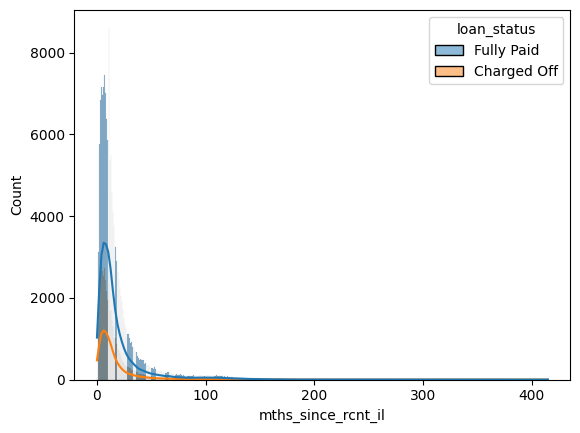

In [467]:
sns.histplot(data=df_modified, x='mths_since_rcnt_il', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='mths_since_rcnt_il'>

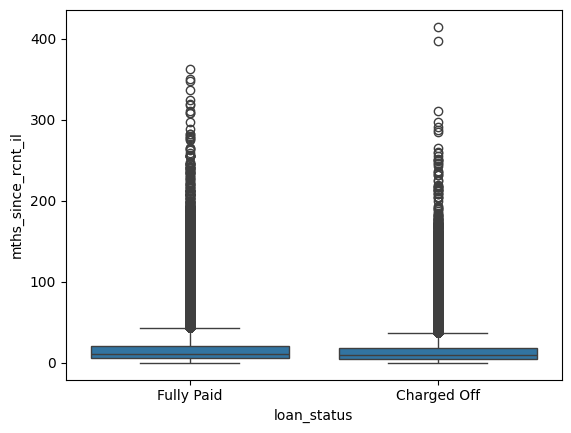

In [468]:
sns.boxplot(x='loan_status', y='mths_since_rcnt_il', data=df_modified)

In [469]:
df_modified['mths_since_rcnt_il_log'] = np.log1p(df_modified['mths_since_rcnt_il'])

Shape of the DataFrame where mths_since_rcnt_il_log is less than 4.5: (185420, 47)


<Axes: xlabel='mths_since_rcnt_il_log', ylabel='Count'>

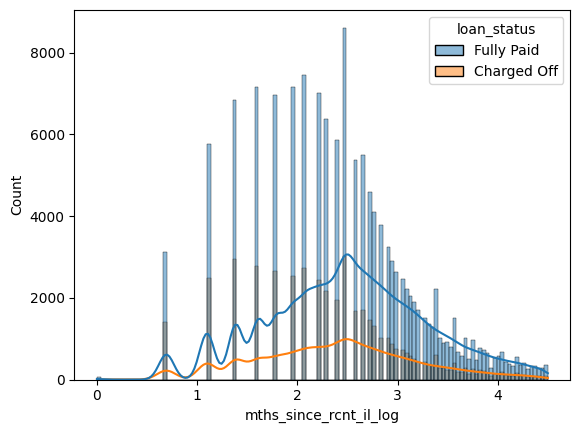

In [470]:
upper_threshold = 4.5
filtered_df = df_modified[df_modified['mths_since_rcnt_il_log'] < upper_threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where mths_since_rcnt_il_log is less than {upper_threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='mths_since_rcnt_il_log', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='mths_since_rcnt_il_log'>

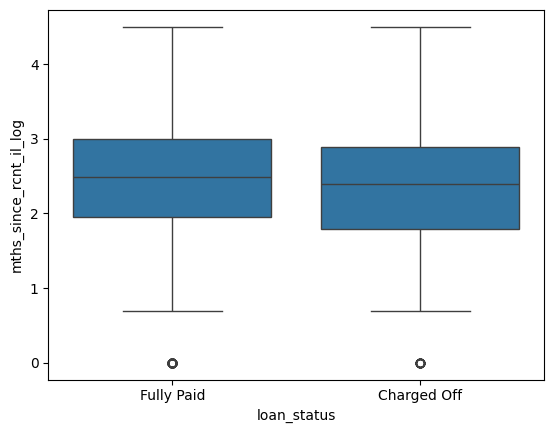

In [471]:
sns.boxplot(x='loan_status', y='mths_since_rcnt_il_log', data=filtered_df)

In [ ]:
df_modified = df_modified.drop(columns = ['mths_since_rcnt_il'])

##### total_bal_il

<Axes: xlabel='total_bal_il', ylabel='Count'>

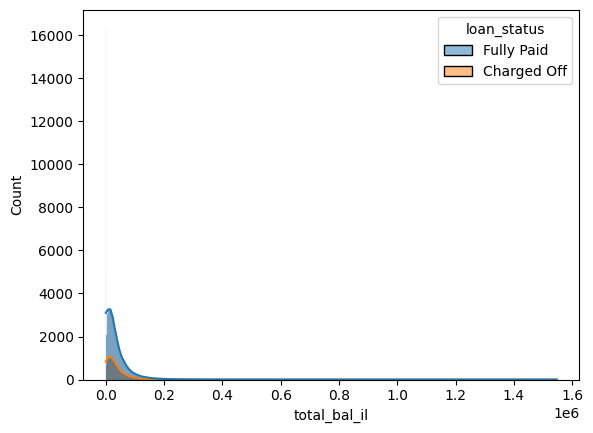

In [475]:
sns.histplot(data=df_modified, x='total_bal_il', kde=True, hue='loan_status')

Shape of the DataFrame where total_bal_il is less than 200000: (189525, 46)


<Axes: xlabel='total_bal_il', ylabel='Count'>

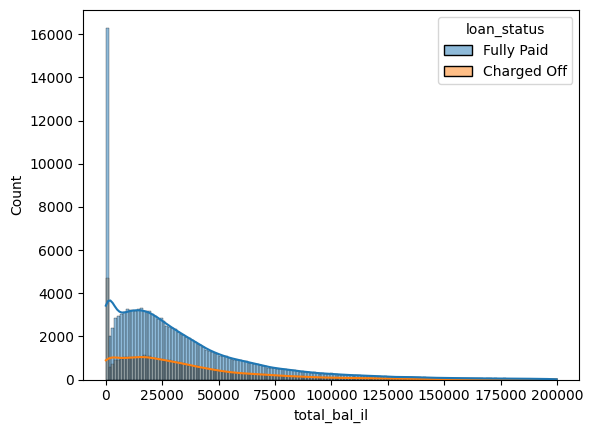

In [476]:
upper_threshold = 200000
filtered_df = df_modified[df_modified['total_bal_il'] < upper_threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where total_bal_il is less than {upper_threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='total_bal_il', kde=True, hue='loan_status')

In [477]:
df_modified = df_modified.drop(columns = ['total_bal_il'])

##### open_rv_12m

In [479]:
df_modified['open_rv_12m'].value_counts()

open_rv_12m
0.0     59385
1.0     56852
2.0     36536
3.0     19580
4.0      9507
5.0      4621
6.0      2373
7.0      1204
8.0       597
9.0       309
10.0      200
11.0      117
12.0       62
13.0       34
14.0       31
15.0       25
16.0        9
17.0        8
18.0        7
20.0        4
19.0        3
21.0        3
24.0        1
28.0        1
26.0        1
Name: count, dtype: int64

In [480]:
grouped = df_modified.groupby(['open_rv_12m', 'loan_status']).size().unstack(fill_value=0)

# Calculate percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Display the counts and percentages
print("Counts:\n", grouped)
print("\nPercentages:\n", percentages.round(2))

Counts:
 loan_status  Charged Off  Fully Paid
open_rv_12m                         
0.0                13366       46019
1.0                13635       43217
2.0                 9650       26886
3.0                 5457       14123
4.0                 2765        6742
5.0                 1396        3225
6.0                  731        1642
7.0                  366         838
8.0                  176         421
9.0                   79         230
10.0                  59         141
11.0                  36          81
12.0                  16          46
13.0                   8          26
14.0                  11          20
15.0                   5          20
16.0                   2           7
17.0                   4           4
18.0                   4           3
19.0                   0           3
20.0                   1           3
21.0                   1           2
24.0                   1           0
26.0                   0           1
28.0                   0     

In [481]:
df_modified = df_modified.drop(columns = ['open_rv_12m'])

##### open_rv_24m

In [483]:
grouped = df_modified.groupby(['open_rv_24m', 'loan_status']).size().unstack(fill_value=0)

# Calculate percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Display the counts and percentages
print("Counts:\n", grouped)
print("\nPercentages:\n", percentages.round(2))

Counts:
 loan_status  Charged Off  Fully Paid
open_rv_24m                         
0.0                 4780       18399
1.0                 7660       27868
2.0                 8464       27614
3.0                 7624       22021
4.0                 5859       15856
5.0                 4204       10929
6.0                 3010        7119
7.0                 1978        4830
8.0                 1388        3015
9.0                  928        1979
10.0                 590        1313
11.0                 394         893
12.0                 265         538
13.0                 187         407
14.0                 135         248
15.0                  69         173
16.0                  67         139
17.0                  43          89
18.0                  39          80
19.0                  18          44
20.0                  14          31
21.0                  10          26
22.0                  11          18
23.0                   5           7
24.0                   6     

##### max_bal_bc

<Axes: xlabel='max_bal_bc', ylabel='Count'>

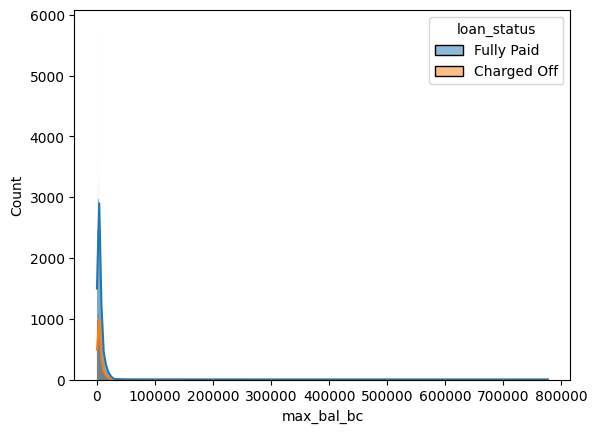

In [484]:
sns.histplot(data=df_modified, x='max_bal_bc', kde=True, hue='loan_status')

Shape of the DataFrame where max_bal_bc is less than 20000: (187167, 44)


<Axes: xlabel='max_bal_bc', ylabel='Count'>

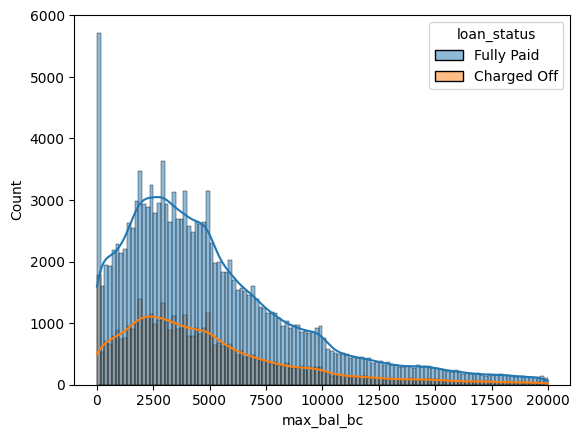

In [488]:
upper_threshold = 20000
filtered_df = df_modified[df_modified['max_bal_bc'] < upper_threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where max_bal_bc is less than {upper_threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='max_bal_bc', kde=True, hue='loan_status')

#### Remove Outliers

In [482]:
df_modified.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,revol_util,total_acc,open_acc_6m,il_util,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,total_pymnt_log,total_rec_int_log,revol_bal_log,total_rec_prncp_log,last_pymnt_amnt_log,tot_cur_bal_log,mths_since_rcnt_il_log
count,191470.000000,191470.000000,191470.00000,1.914700e+05,191470.000000,191470.000000,191470.000000,191470.000000,191470.000000,191470.000000,191470.000000,191470.000000,191470.000000,191470.000000,1.914700e+05,191470.000000,191470.000000,191470.000000,191470.000000,191470.000000,191470.000000,191470.000000,191470.000000,191470.000000,191470.000000
mean,14603.820311,13.787453,450.61914,7.985013e+04,18.566772,0.342027,0.635567,47.739709,25.424348,1.117340,72.599271,3.146973,5578.103745,59.074033,3.447223e+04,1.120186,1.705813,2.452906,9.032806,6.552047,9.127529,8.770985,7.873327,11.268563,2.542192
std,9114.531736,5.470431,282.45884,7.633034e+04,11.188389,0.929747,0.918964,24.726554,12.319099,1.257262,20.875938,2.767618,5588.658851,20.724057,3.522211e+04,1.632751,2.931414,2.632323,1.085315,1.431272,1.298048,1.321997,1.889542,1.287449,0.886239
min,1000.000000,5.320000,30.12000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.000000,9.750000,242.57000,4.900000e+04,11.900000,0.000000,0.000000,28.800000,17.000000,0.000000,63.000000,1.000000,2212.000000,46.000000,1.470000e+04,0.000000,0.000000,1.000000,8.509623,5.932835,8.616314,8.117014,6.305413,10.372334,1.945910
50%,12000.000000,12.880000,377.76000,6.800000e+04,17.900000,0.000000,0.000000,47.000000,24.000000,1.000000,72.599271,3.000000,4231.000000,61.000000,2.530000e+04,1.000000,0.000000,2.000000,9.203982,6.778990,9.267571,9.036106,8.481376,11.393584,2.484907
75%,20000.000000,16.990000,607.73250,9.500000e+04,24.600000,0.000000,1.000000,66.300000,32.000000,2.000000,86.000000,4.000000,7239.750000,74.000000,4.270000e+04,2.000000,2.000000,3.000000,9.763191,7.500951,9.860319,9.680406,9.401149,12.303305,3.044522
max,40000.000000,30.990000,1714.54000,9.550000e+06,999.000000,21.000000,5.000000,172.000000,176.000000,18.000000,558.000000,45.000000,776843.000000,198.000000,1.252500e+06,28.000000,79.000000,40.000000,10.873902,9.623337,13.853783,10.596660,10.648979,15.510211,6.030685


In [323]:
df_modified = df_modified[df_modified['annual_inc'] < 170000]
df_modified = df_modified[df_modified['dti'] < 47]
df_modified = df_modified[df_modified['delinq_2yrs'] < 5]
df_modified = df_modified[(df_modified['revol_bal_log'] > 5) & (df_modified['revol_bal_log'] < 13)]
df_modified = df_modified[df_modified['revol_util'] < 110]
df_modified = df_modified[df_modified['total_acc'] < 70]
df_modified = df_modified[df_modified['total_pymnt_log'] > 6]
df_modified = df_modified[df_modified['total_rec_prncp_log'] > 4]
df_modified = df_modified[df_modified['total_rec_int_log'] > 3]
df_modified = df_modified[df_modified['last_pymnt_amnt_log'] > 3]
df_modified = df_modified[df_modified['tot_cur_bal_log'] > 7.8]
df_modified = df_modified[df_modified['open_acc_6m'] < 7]
df_modified = df_modified[df_modified['mths_since_rcnt_il_log'] < 4.5]
df_modified = df_modified[(df_modified['il_util'] > 18) & (df_modified['il_util'] < 135)]
df_modified = df_modified[df_modified['open_rv_24m'] < 15]
df_modified = df_modified[df_modified['max_bal_bc'] < 20000]

df_modified.describe()


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,revol_util,total_acc,open_acc_6m,open_il_12m,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,total_pymnt_log,total_rec_int_log,revol_bal_log,total_rec_prncp_log,last_pymnt_amnt_log,tot_cur_bal_log,mths_since_rcnt_il_log
count,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000,162842.000000
mean,14427.568748,13.866210,445.214874,72238.015328,19.115859,0.283017,0.623795,48.463686,25.188158,1.101731,0.854270,35683.257943,72.820268,1.480865,3.144686,5401.199414,59.841442,32516.907978,1.120288,1.729357,2.431351,9.073063,6.714688,9.193297,8.819514,7.934360,11.275215,2.475425
std,8780.320882,5.475131,272.233567,31599.222428,8.434262,0.669148,0.904505,24.028965,11.602878,1.189612,1.016807,38811.611599,20.640671,1.550692,2.680727,4709.450383,19.828907,28515.890881,1.617074,2.897972,2.594687,0.911256,1.129435,0.969719,1.114990,1.728046,1.170180,0.795480
min,1000.000000,5.320000,30.120000,0.000000,-1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,6.000053,3.000222,5.003946,4.027136,3.000720,7.803435,0.000000
25%,7600.000000,9.750000,246.990000,49000.000000,12.810000,0.000000,0.000000,30.000000,17.000000,0.000000,0.000000,11440.000000,63.000000,0.000000,1.000000,2302.000000,47.000000,14800.000000,0.000000,0.000000,1.000000,8.532026,6.049002,8.651374,8.155359,6.325205,10.391531,1.945910
50%,12000.000000,12.990000,375.990000,66239.000000,18.620000,0.000000,0.000000,47.600000,24.000000,1.000000,1.000000,25212.000000,73.000000,1.000000,3.000000,4231.000000,61.000000,24900.000000,1.000000,1.000000,2.000000,9.202175,6.823150,9.265491,9.036106,8.490510,11.357224,2.484907
75%,20000.000000,16.990000,593.240000,90000.000000,25.130000,0.000000,1.000000,66.400000,32.000000,2.000000,1.000000,46674.000000,86.000000,2.000000,4.000000,7040.000000,74.000000,41200.000000,2.000000,2.000000,3.000000,9.746379,7.519031,9.829249,9.655090,9.384755,12.264815,2.995732
max,40000.000000,30.990000,1714.540000,169992.000000,46.990000,4.000000,5.000000,109.600000,69.000000,6.000000,11.000000,796104.000000,558.000000,20.000000,45.000000,135471.000000,198.000000,683300.000000,27.000000,54.000000,40.000000,10.873902,9.623337,12.970915,10.596660,10.648979,14.192514,4.499810


#### Categorical variables

In [ ]:
print(df_modified.describe(include='object'))
df_modified.head()

##### Grade and SubGrade

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='grade', hue='loan_status', data=df_modified, order=sorted(df_modified['grade'].unique()))
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(x='sub_grade', hue='loan_status', data=df_modified, order=sorted(df_modified['sub_grade'].unique()))
plt.title('Loan Status by Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [ ]:
df_modified = df_modified.drop(columns=['grade']);

##### Home Ownership

In [ ]:
df_modified['home_ownership'].value_counts()

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='home_ownership', hue='loan_status', data=df_modified, order=sorted(df_modified['home_ownership'].unique()))
plt.title('Loan Status by home_ownership')
plt.xlabel('home_ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [ ]:
# Filter the DataFrame for rows where home_ownership is 'any' or 'none'
filtered_df = df_modified[df_modified['home_ownership'].isin(['ANY', 'NONE'])]

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=filtered_df)
plt.title('Loan Status by Home Ownership (Any or None)')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [ ]:
df_modified.loc[df_modified['home_ownership'] == 'NONE', 'home_ownership'] = 'ANY'
df_modified['home_ownership'].value_counts()

##### Purpose

In [ ]:
df_modified['purpose'].value_counts()

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='purpose', hue='loan_status', data=df_modified, order=sorted(df_modified['purpose'].unique()))
plt.title('Loan Status by purpose')
plt.xlabel('purpose')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

##### Verification Status

In [ ]:
df_modified['verification_status'].value_counts()

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='verification_status', hue='loan_status', data=df_modified, order=sorted(df_modified['verification_status'].unique()))
plt.title('Loan Status by verification_status')
plt.xlabel('verification_status')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

##### Employment Length

In [ ]:
print(df_modified['emp_length'].value_counts())
print('--------------------------------\n')

null_emp_length_df = df_modified[df_modified['emp_length'].isnull()]
print(null_emp_length_df['loan_status'].value_counts())

grouped = df_modified.groupby(['emp_length', 'loan_status']).size().unstack();
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Loan Status vs Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')


for col in grouped.columns:
    for i, val in enumerate(grouped.index):
        total_counts = grouped.loc[val].sum()
        if total_counts != 0:
            percentage = (grouped.loc[val, col] / total_counts * 100).round(2)
            plt.text(i, grouped.loc[val, col] / 2, str(percentage) + '%', ha='center', color='black', fontsize=8)

plt.show()

In [ ]:
df_modified = df_modified.drop(columns='emp_length');

##### Address State

In [ ]:
df_modified['addr_state'].unique()


In [ ]:
# Group by addr_state and loan_status
grouped_state = df_modified.groupby(['addr_state', 'loan_status']).size().unstack()

# Plot
plt.figure(figsize=(30, 16))
grouped_state.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Loan Status vs Address State')
plt.xlabel('Address State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')

# Calculate and display the percentage of loan status in every address state
for col in grouped_state.columns:
    for i, val in enumerate(grouped_state.index):
        total_counts = grouped_state.loc[val].sum()
        if total_counts != 0:
            percentage = (grouped_state.loc[val, col] / total_counts * 100).round(2)
            plt.text(i, grouped_state.loc[val, col] / 2, str(percentage) + '%', ha='center', color='black', fontsize=8)

plt.show()

##### Term

In [ ]:
df_modified['term'].value_counts()

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='term', hue='loan_status', data=df_modified, order=sorted(df_modified['term'].unique()))
plt.title('Loan Status by term')
plt.xlabel('term')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

#### Encoding Categorical variables

In [ ]:
df_modified.describe(include='object')

##### Ranking Categorical variables

###### sub_grade

In [ ]:
sub_grades = df_modified['sub_grade'].unique();
print(sub_grades)

encoder = OrdinalEncoder(categories=[sub_grades])

encoded_sub_grades = encoder.fit_transform(df_modified[['sub_grade']])
print(encoded_sub_grades)

df_modified['encoded_sub_grade'] = encoded_sub_grades
print(df_modified.shape)
df_modified.describe(include='all')

##### Nominal categorical variables


###### home_ownership

In [ ]:
ownership_types = df_modified['home_ownership'].unique()
print(ownership_types)
print('----------------\n')
print(df_modified['home_ownership'].value_counts())

one_hot_df = pd.get_dummies(df_modified['home_ownership'], prefix='home_ownership')

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df_encoded_home_ownership = pd.concat([df_modified, one_hot_df], axis=1)

print(df_encoded_home_ownership.shape)
print(df_encoded_home_ownership.describe(include='all'))


###### Purpose

In [ ]:
purposes = df_modified['purpose'].unique()
print(purposes)
print('----------------\n')
print(df_modified['purpose'].value_counts())

one_hot_df = pd.get_dummies(df_encoded_home_ownership['purpose'], prefix='purpose')

df_encoded_purpose = pd.concat([df_encoded_home_ownership, one_hot_df], axis=1)

print(df_encoded_purpose.shape)
print(df_encoded_purpose.describe(include='all'))

###### verification_status

In [ ]:
verification_statuses = df_modified['verification_status'].unique()
print(verification_statuses)
print('----------------\n')
print(df_modified['verification_status'].value_counts())

one_hot_df = pd.get_dummies(df_encoded_purpose['verification_status'], prefix='verification_status')

df_encoded_verification_status = pd.concat([df_encoded_purpose, one_hot_df], axis=1)

print(df_encoded_verification_status.shape)
print(df_encoded_verification_status.describe(include='all'))

###### addr_state

In [ ]:
df_modified.addr_state.value_counts().sort_values(ascending=False)

In [ ]:
states_to_encode = [state for state in df_modified.addr_state.value_counts().sort_values(ascending=False).head(17).index]
print(states_to_encode)

for state in states_to_encode:
    df_modified[state] = np.where(df_modified['addr_state'] == state,  1, 0)

df_encoded_addr_state = pd.concat([df_encoded_verification_status, df_modified[states_to_encode]], axis=1)

print(df_encoded_addr_state.describe())
print(df_encoded_addr_state.shape)

###### term

In [ ]:
term_types = df_modified['term'].unique()
print(term_types)
print('----------------\n')
print(df_modified['term'].value_counts())
 
label_encoder = LabelEncoder()
 
df_encoded_term = df_encoded_addr_state
df_encoded_term['term'] = label_encoder.fit_transform(df_encoded_addr_state['term'])
 
print(df_encoded_term.shape)
df_encoded_term.describe(include='all')

##### Remove additional Columns

In [ ]:
# Remove encoded columns
df_all_encoded = df_encoded_term.drop(columns=['home_ownership', 'purpose', 'verification_status',
                                                'addr_state', 'sub_grade'])

print(df_all_encoded.describe(include='all'))

In [ ]:
# Remove dummy variable trap
df_all_encoded = df_all_encoded.drop(columns=['verification_status_Verified', 'purpose_renewable_energy', 'home_ownership_ANY', 'principal_collected_percentage'])

In [ ]:
print(df_all_encoded.describe())
print(df_all_encoded.shape)

df_all_encoded.head(20)

In [ ]:
print(df_all_encoded['loan_status'].value_counts())

#### Spliting Training and Testing data sets

In [ ]:
df_all_encoded_no_duplicates = df_all_encoded.drop_duplicates()

train_data, test_data = train_test_split(df_all_encoded, test_size=0.5, random_state=42)

print(train_data.shape)
print(test_data.shape)

#### Treating Outliers

In [ ]:
train_data = train_data[train_data['annual_inc'] <= 170000]
train_data = train_data[train_data['dti'] <= 42]
train_data = train_data[train_data['revol_util'] <= 110]
train_data = train_data[train_data['delinq_2yrs'] <= 5]
train_data = train_data[train_data['open_acc'] <= 25]
train_data = train_data[train_data['pub_rec'] <= 8]
train_data = train_data[train_data['total_acc'] <= 75]
train_data = train_data[train_data['collections_12_mths_ex_med'] <= 4]
print(train_data.shape)

#### Feature Scaling

In [ ]:
continuous_features = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [ ]:
continuous_features = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Scale only the identified continuous features
scaler = RobustScaler()
train_data_scaled = train_data.copy() 
test_data_scaled = test_data.copy()

train_data_scaled[continuous_features] = scaler.fit_transform(train_data[continuous_features])
test_data_scaled[continuous_features] = scaler.transform(test_data[continuous_features])

In [ ]:
train_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data_scaled.columns)

In [ ]:
train_scaled_df.hvplot.box(rot=90, width=1000, height= 500)    

#### Build a Model and Test

In [ ]:
class_weight = dict({'Fully Paid':1, 'Charged Off': 3})

logistic_model = LogisticRegression(class_weight=class_weight)
logistic_model.fit(train_X_scaled, train_y)

# Predicting on the test set
predictions = logistic_model.predict(test_X_scaled)

# Calculating accuracy
accuracy = accuracy_score(test_y, predictions)     
print("Accuracy:", accuracy)
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, predictions))

In [ ]:
class_weight = dict({'Fully Paid':1, 'Charged Off': 3})

classifier = RandomForestClassifier(class_weight=class_weight)
classifier.fit(train_X_scaled, train_y)

predictions = classifier.predict(test_X_scaled)

# Calculating accuracy
accuracy = accuracy_score(test_y, predictions)     
print("Accuracy:", accuracy)
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, predictions))

In [ ]:
# Applying Neural Network
neural_network_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Fit the model to the scaled training data
neural_network_model.fit(train_X_scaled, train_y)

# Predicting on the test set
predictions = neural_network_model.predict(test_X_scaled)

# Calculating accuracy
accuracy = accuracy_score(test_y, predictions)     
print("Accuracy:", accuracy)
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, predictions))